# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
import warnings # ignore warnings
warnings.filterwarnings('ignore')

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [3]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
!pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [592 lines of output]
  
  Edit setup.cfg to change the build options; suppress output with --quiet.
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.3.4]
        python: yes [3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023,
                    18:05:47) [MSC v.1916 64 bit (AMD64)]]
      platform: yes [win32]
   sample_data: yes [installing]
         tests: no  [skipping due to configuration]
        macosx: no  [Mac OS-X only]
  
  C:\Users\otroc\anaconda3\Lib\site-packages\setuptools\__init__.py:80: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
  !!
  
          ********************************************************************************
          Requirements should be satisfied by a PEP 517 installer.
          If you are using pip, you can try `pip install --use-pep517`.
          ***************************************

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [4]:
# Common Libraries
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import scipy.stats as stats # mathematical algorithms and convenience functions
import statsmodels.stats.multicomp as stats_sm # statistical models, statistical tests, and statistical data exploration
import statsmodels.stats.proportion as stats_sp # statistical models, statistical tests, and statistical data exploration
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import pylab # for QQ plots
from scipy.stats import zscore

# Command to tell Python to actually display the graphs
%matplotlib inline 
sns.set_style('whitegrid') # set style for visualization
pd.set_option('display.float_format', lambda x: '%.4f' % x) # To supress numerical display in scientific notations


#For randomized data splitting
from sklearn.model_selection import train_test_split
#To build linear regression_model
import statsmodels.api as sm
#To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#To check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
#To check Heteroscedasticity
import statsmodels.stats.api as sms
from statsmodels.compat import lzip


## Loading the dataset

In [5]:
path1='C:\\Users\\otroc\\OneDrive\\Documents\\Carlos\\Training\\DSBA\\Python\\Jupyter Notebooks\\Module3_Project\\used_device_data.csv'
df = pd.read_csv(path1)

## Data Overview

- Observations
- Sanity checks
- Missing value treatment 
- Feature engineering

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [7]:
df.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android      14.5000  yes   no         13.0000   
1      Honor  Android      17.3000  yes  yes         13.0000   
2      Honor  Android      16.6900  yes  yes         13.0000   
3      Honor  Android      25.5000  yes  yes         13.0000   
4      Honor  Android      15.3200  yes   no         13.0000   

   selfie_camera_mp  int_memory    ram   battery   weight  release_year  \
0            5.0000     64.0000 3.0000 3020.0000 146.0000          2020   
1           16.0000    128.0000 8.0000 4300.0000 213.0000          2020   
2            8.0000    128.0000 8.0000 4200.0000 213.0000          2020   
3            8.0000     64.0000 6.0000 7250.0000 480.0000          2020   
4            8.0000     64.0000 3.0000 5000.0000 185.0000          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127                 4.3076                4.7151  
1        325                 5.1621                5.5190  
2        162                 5.1111                5.8846  
3        345                 5.1354                5.6310  
4        293                 4.3900                4.9478

In [8]:
df.tail()

brand_name       os  screen_size   4g  5g  main_camera_mp  \
3449       Asus  Android      15.3400  yes  no             NaN   
3450       Asus  Android      15.2400  yes  no         13.0000   
3451    Alcatel  Android      15.8000  yes  no         13.0000   
3452    Alcatel  Android      15.8000  yes  no         13.0000   
3453    Alcatel  Android      12.8300  yes  no         13.0000   

      selfie_camera_mp  int_memory    ram   battery   weight  release_year  \
3449            8.0000     64.0000 6.0000 5000.0000 190.0000          2019   
3450            8.0000    128.0000 8.0000 4000.0000 200.0000          2018   
3451            5.0000     32.0000 3.0000 4000.0000 165.0000          2020   
3452            5.0000     32.0000 2.0000 4000.0000 160.0000          2020   
3453            5.0000     16.0000 2.0000 4000.0000 168.0000          2020   

      days_used  normalized_used_price  normalized_new_price  
3449        232                 4.4923                6.4839  
3450        541                 5.0377                6.2515  
3451        201                 4.3573                4.5288  
3452        149                 4.3498                4.6242  
3453        176                 4.1321                4.2800

In [9]:
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 3454 rows and 15 columns.


In [10]:
df.describe(include='all').T

count unique      top  freq      mean       std  \
brand_name                 3454     34   Others   502       NaN       NaN   
os                         3454      4  Android  3214       NaN       NaN   
screen_size           3454.0000    NaN      NaN   NaN   13.7131    3.8053   
4g                         3454      2      yes  2335       NaN       NaN   
5g                         3454      2       no  3302       NaN       NaN   
main_camera_mp        3275.0000    NaN      NaN   NaN    9.4602    4.8155   
selfie_camera_mp      3452.0000    NaN      NaN   NaN    6.5542    6.9704   
int_memory            3450.0000    NaN      NaN   NaN   54.5731   84.9724   
ram                   3450.0000    NaN      NaN   NaN    4.0361    1.3651   
battery               3448.0000    NaN      NaN   NaN 3133.4027 1299.6828   
weight                3447.0000    NaN      NaN   NaN  182.7519   88.4132   
release_year          3454.0000    NaN      NaN   NaN 2015.9653    2.2985   
days_used             3454.0000    NaN      NaN   NaN  674.8697  248.5802   
normalized_used_price 3454.0000    NaN      NaN   NaN    4.3647    0.5889   
normalized_new_price  3454.0000    NaN      NaN   NaN    5.2331    0.6836   

                            min       25%       50%       75%       max  
brand_name                  NaN       NaN       NaN       NaN       NaN  
os                          NaN       NaN       NaN       NaN       NaN  
screen_size              5.0800   12.7000   12.8300   15.3400   30.7100  
4g                          NaN       NaN       NaN       NaN       NaN  
5g                          NaN       NaN       NaN       NaN       NaN  
main_camera_mp           0.0800    5.0000    8.0000   13.0000   48.0000  
selfie_camera_mp         0.0000    2.0000    5.0000    8.0000   32.0000  
int_memory               0.0100   16.0000   32.0000   64.0000 1024.0000  
ram                      0.0200    4.0000    4.0000    4.0000   12.0000  
battery                500.0000 2100.0000 3000.0000 4000.0000 9720.0000  
weight                  69.0000  142.0000  160.0000  185.0000  855.0000  
release_year          2013.0000 2014.0000 2015.5000 2018.0000 2020.0000  
days_used               91.0000  533.5000  690.5000  868.7500 1094.0000  
normalized_used_price    1.5369    4.0339    4.4051    4.7557    6.6194  
normalized_new_price     2.9014    4.7903    5.2459    5.6737    7.8478

In [11]:
df.duplicated().sum()

0

In [12]:
df.nunique()

brand_name                 34
os                          4
screen_size               142
4g                          2
5g                          2
main_camera_mp             41
selfie_camera_mp           37
int_memory                 15
ram                        12
battery                   324
weight                    555
release_year                8
days_used                 924
normalized_used_price    3094
normalized_new_price     2988
dtype: int64

In [13]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [14]:
df.isnull().sum().sum()

202

In [15]:
df.isnull().sum().sum()/df.shape[0]

0.05848291835552982

**NOTES:**

- Data includes 3454 rows and 15 columns.
- 5.8% of data is missing (NaN).

In [16]:
Brands_table=pd.DataFrame({'Count':df['brand_name'].value_counts(),'Proportion':df['brand_name'].value_counts(normalize=True)})
Brands_table

Count  Proportion
Others        502      0.1453
Samsung       341      0.0987
Huawei        251      0.0727
LG            201      0.0582
Lenovo        171      0.0495
ZTE           140      0.0405
Xiaomi        132      0.0382
Oppo          129      0.0373
Asus          122      0.0353
Alcatel       121      0.0350
Micromax      117      0.0339
Vivo          117      0.0339
Honor         116      0.0336
HTC           110      0.0318
Nokia         106      0.0307
Motorola      106      0.0307
Sony           86      0.0249
Meizu          62      0.0180
Gionee         56      0.0162
Acer           51      0.0148
XOLO           49      0.0142
Panasonic      47      0.0136
Realme         41      0.0119
Apple          39      0.0113
Lava           36      0.0104
Celkon         33      0.0096
Spice          30      0.0087
Karbonn        29      0.0084
Coolpad        22      0.0064
BlackBerry     22      0.0064
Microsoft      22      0.0064
OnePlus        22      0.0064
Google         15      0.0043
Infinix        10      0.0029

In [17]:
df.groupby('brand_name')['main_camera_mp'].mean()

brand_name
Acer          6.9676
Alcatel       6.4322
Apple         9.8205
Asus         10.0182
BlackBerry   10.3333
Celkon        3.9970
Coolpad      11.2632
Gionee        9.9134
Google       11.9333
HTC          10.7927
Honor        12.3276
Huawei       10.3404
Infinix          NaN
Karbonn       6.7552
LG            8.3450
Lava          6.8456
Lenovo        8.9518
Meizu        13.6085
Micromax      6.1047
Microsoft     9.4545
Motorola     12.9205
Nokia         5.8396
OnePlus      14.2000
Oppo         10.4445
Others        8.0130
Panasonic    10.4278
Realme       13.0000
Samsung       9.1774
Sony         14.8709
Spice         4.9217
Vivo         12.8592
XOLO          7.4551
Xiaomi       12.3991
ZTE          11.6956
Name: main_camera_mp, dtype: float64

In [18]:
df[df['brand_name']=="Infinix"]

brand_name       os  screen_size   4g  5g  main_camera_mp  \
59     Infinix  Android      17.3200  yes  no             NaN   
60     Infinix  Android      15.3900  yes  no             NaN   
61     Infinix  Android      15.3900  yes  no             NaN   
62     Infinix  Android      15.3900  yes  no             NaN   
63     Infinix  Android      15.2900  yes  no             NaN   
278    Infinix  Android      17.3200  yes  no             NaN   
279    Infinix  Android      15.3900  yes  no             NaN   
280    Infinix  Android      15.3900  yes  no             NaN   
281    Infinix  Android      15.3900  yes  no             NaN   
282    Infinix  Android      15.2900  yes  no             NaN   

     selfie_camera_mp  int_memory    ram   battery   weight  release_year  \
59             8.0000     32.0000 2.0000 6000.0000 209.0000          2020   
60             8.0000     64.0000 4.0000 5000.0000 185.0000          2020   
61             8.0000     32.0000 2.0000 5000.0000 185.0000          2020   
62            16.0000     32.0000 3.0000 4000.0000 178.0000          2019   
63            16.0000     32.0000 2.0000 4000.0000 165.0000          2019   
278            8.0000     32.0000 2.0000 6000.0000 209.0000          2020   
279            8.0000     64.0000 4.0000 5000.0000 185.0000          2020   
280            8.0000     32.0000 2.0000 5000.0000 185.0000          2020   
281           16.0000     32.0000 3.0000 4000.0000 178.0000          2019   
282           16.0000     32.0000 2.0000 4000.0000 165.0000          2019   

     days_used  normalized_used_price  normalized_new_price  
59         245                 4.2821                4.5976  
60         173                 4.3636                4.7118  
61         256                 4.1814                4.5055  
62         316                 4.5552                4.6022  
63         468                 4.4167                4.8713  
278        320                 4.4051                4.6054  
279        173                 4.4959                4.7021  
280        329                 4.3707                4.4873  
281        356                 4.4180                4.6060  
282        497                 4.4233                4.8661

In [19]:
df[df['brand_name']=="Infinix"].shape

(10, 15)

**NOTES:**
- Missing values concentrated on variables related to camera type (181 out of the **total 202 missing values**) where imputation will be conducted.
- As imputation will be done using mean value, this is calculated by brand. Resulting on the identification of a particular case for brand "Infinix" requiring freature engineering.
- All (10) units from brand: Infinix have missing value on feature "main_camera_mp". As those units do have a selfie camera it is assumed it should also have a main camera, then, the missing information will be imputed.
- Brands might follow different approachs to design main camera. It is assumed that is the device have a selfie camara, should also have a main camera, then NaN imputation by mean is considered for the variable of main camera by grouping the data on brand and selfie camera.
- The feature selfie_camera_mp feature have a 2 missing values. As this feature will be used as grouping criteria to impute main_camera_mp, the first step will be imputing the feature selfie_cameramp.


In [20]:
df2=df.copy()

In [21]:
df2[(df2['selfie_camera_mp'].isnull()==True)]

brand_name       os  screen_size   4g  5g  main_camera_mp  \
1080     Google  Android      15.3200  yes  no         12.2000   
1081     Google  Android      12.8300  yes  no         12.2000   

      selfie_camera_mp  int_memory    ram   battery   weight  release_year  \
1080               NaN     64.0000 4.0000 3430.0000 184.0000          2018   
1081               NaN     64.0000 4.0000 2915.0000 148.0000          2018   

      days_used  normalized_used_price  normalized_new_price  
1080        475                 5.5738                6.8660  
1081        424                 4.4650                6.7451

In [22]:
# Group by 'brand_name' and impute with mean
df2['selfie_camera_mp'] = df2.groupby(['brand_name'])['selfie_camera_mp'].transform(lambda x: x.fillna(x.mean()))
df2.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           0
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

**NOTES:**
- Imputed 2 missing values on selfie_camera_mp. **Remains in total 200 missing values**.


In [23]:
# Group by 'brand_name' and 'selfie_camera_mp' and impute with mean
# as several steps might be required, a new variable is defined for imputing main camera
df2['main_camera_mp_imp'] = df2.groupby(['brand_name','selfie_camera_mp'])['main_camera_mp'].transform(lambda x: x.fillna(x.mean()))
df2.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           0
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
main_camera_mp_imp        19
dtype: int64

**NOTES:**
- Imputed 160 out of 179 main_camera_mp missing data, still 19 cases remains from this variable. **Remains in total 40 missing values**.
- As there is no main camera reference for Infinix brand, it will be imputed considering "others" brands group, also grouped by selfie camera



In [24]:
#checking remaining missing values on main camera
df2[(df2['main_camera_mp_imp'].isnull()==True)]

brand_name       os  screen_size   4g   5g  main_camera_mp  \
59       Infinix  Android      17.3200  yes   no             NaN   
60       Infinix  Android      15.3900  yes   no             NaN   
61       Infinix  Android      15.3900  yes   no             NaN   
62       Infinix  Android      15.3900  yes   no             NaN   
63       Infinix  Android      15.2900  yes   no             NaN   
204          ZTE  Android      16.8900  yes  yes             NaN   
205          ZTE  Android      16.8900  yes  yes             NaN   
278      Infinix  Android      17.3200  yes   no             NaN   
279      Infinix  Android      15.3900  yes   no             NaN   
280      Infinix  Android      15.3900  yes   no             NaN   
281      Infinix  Android      15.3900  yes   no             NaN   
282      Infinix  Android      15.2900  yes   no             NaN   
401      Coolpad  Android      16.5900  yes  yes             NaN   
819   BlackBerry  Android      15.2100  yes   no             NaN   
820   BlackBerry  Android      15.2100  yes   no             NaN   
2202   Panasonic  Android      15.7000  yes   no             NaN   
3268      Realme  Android      15.3700  yes   no             NaN   
3409      Realme  Android      15.3700  yes   no             NaN   
3448        Asus  Android      16.7400  yes   no             NaN   

      selfie_camera_mp  int_memory    ram   battery   weight  release_year  \
59              8.0000     32.0000 2.0000 6000.0000 209.0000          2020   
60              8.0000     64.0000 4.0000 5000.0000 185.0000          2020   
61              8.0000     32.0000 2.0000 5000.0000 185.0000          2020   
62             16.0000     32.0000 3.0000 4000.0000 178.0000          2019   
63             16.0000     32.0000 2.0000 4000.0000 165.0000          2019   
204            12.0000    256.0000 8.0000 5100.0000 215.0000          2020   
205            12.0000    128.0000 6.0000 5100.0000 210.0000          2020   
278             8.0000     32.0000 2.0000 6000.0000 209.0000          2020   
279             8.0000     64.0000 4.0000 5000.0000 185.0000          2020   
280             8.0000     32.0000 2.0000 5000.0000 185.0000          2020   
281            16.0000     32.0000 3.0000 4000.0000 178.0000          2019   
282            16.0000     32.0000 2.0000 4000.0000 165.0000          2019   
401            16.0000     64.0000 4.0000 4000.0000 195.0000          2020   
819            16.0000     64.0000 4.0000 4000.0000 170.0000          2018   
820            16.0000     64.0000 4.0000 4000.0000 170.0000          2018   
2202           16.0000    128.0000 4.0000 3000.0000 195.0000          2018   
3268           13.0000     64.0000 4.0000 5000.0000 198.0000          2019   
3409           13.0000     64.0000 4.0000 5000.0000 198.0000          2019   
3448           24.0000    128.0000 8.0000 6000.0000 240.0000          2019   

      days_used  normalized_used_price  normalized_new_price  \
59          245                 4.2821                4.5976   
60          173                 4.3636                4.7118   
61          256                 4.1814                4.5055   
62          316                 4.5552                4.6022   
63          468                 4.4167                4.8713   
204         235                 5.3909                6.3947   
205         278                 4.6521                5.7401   
278         320                 4.4051                4.6054   
279         173                 4.4959                4.7021   
280         329                 4.3707                4.4873   
281         356                 4.4180                4.6060   
282         497                 4.4233                4.8661   
401         252                 5.1742                5.8855   
819         629                 4.6939                5.8530   
820         383                 4.9463                5.7093   
2202        717                 4.8731                5.8562

In [25]:
df2[(df2['main_camera_mp_imp'].isnull()==True)|df2['selfie_camera_mp'].isnull()==True].shape

(19, 16)

In [26]:
df2[(df2['brand_name']=="Infinix")]['selfie_camera_mp'].unique()

array([ 8., 16.])

In [27]:
df2[(df2['brand_name']=="Others")]['selfie_camera_mp'].unique()

array([ 0.3, 20. ,  8. , 16. , 24. ,  5. ,  2. , 13. ,  4. ,  1. ,  2.1,
        3. ,  1.3,  1.2, 16.3])

**NOTES:**
- For "Infinix" 8mp selfie camera, the main camera value will be the average of main camera from "Others" with 8mp selfie camera
- For "Infinix" 16mp selfie camera, the main camera value will be the average of main camera from "Others" with 16mp selfie camera
- Filter1 critera considers brand Infinix or Others (Others limited to those with selfie_camera_mp of 8 or 1)


In [28]:
filter1 = ((df2['brand_name'] == "Others") & (df2['selfie_camera_mp'].isin([8, 16]))) | (df2['brand_name'] == "Infinix")
df2.loc[filter1, 'main_camera_mp_imp'] = df2[filter1].groupby('selfie_camera_mp')['main_camera_mp_imp'].transform(lambda x: x.fillna(x.mean()))
df2.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           0
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
main_camera_mp_imp         9
dtype: int64

**NOTES:**
- Imputed 10 out of 19 main_camera_mp missing data, still 9 cases remains from this variable. **Remains in total 30 missing values**.
- Similar approach will be considered by imputing the main_camera_mp value by the average of main camera from same brand grouped by selfie camer


In [29]:
#checking remaining missing values on main camera
df2[(df2['main_camera_mp_imp'].isnull()==True)]

brand_name       os  screen_size   4g   5g  main_camera_mp  \
204          ZTE  Android      16.8900  yes  yes             NaN   
205          ZTE  Android      16.8900  yes  yes             NaN   
401      Coolpad  Android      16.5900  yes  yes             NaN   
819   BlackBerry  Android      15.2100  yes   no             NaN   
820   BlackBerry  Android      15.2100  yes   no             NaN   
2202   Panasonic  Android      15.7000  yes   no             NaN   
3268      Realme  Android      15.3700  yes   no             NaN   
3409      Realme  Android      15.3700  yes   no             NaN   
3448        Asus  Android      16.7400  yes   no             NaN   

      selfie_camera_mp  int_memory    ram   battery   weight  release_year  \
204            12.0000    256.0000 8.0000 5100.0000 215.0000          2020   
205            12.0000    128.0000 6.0000 5100.0000 210.0000          2020   
401            16.0000     64.0000 4.0000 4000.0000 195.0000          2020   
819            16.0000     64.0000 4.0000 4000.0000 170.0000          2018   
820            16.0000     64.0000 4.0000 4000.0000 170.0000          2018   
2202           16.0000    128.0000 4.0000 3000.0000 195.0000          2018   
3268           13.0000     64.0000 4.0000 5000.0000 198.0000          2019   
3409           13.0000     64.0000 4.0000 5000.0000 198.0000          2019   
3448           24.0000    128.0000 8.0000 6000.0000 240.0000          2019   

      days_used  normalized_used_price  normalized_new_price  \
204         235                 5.3909                6.3947   
205         278                 4.6521                5.7401   
401         252                 5.1742                5.8855   
819         629                 4.6939                5.8530   
820         383                 4.9463                5.7093   
2202        717                 4.8731                5.8562   
3268        299                 4.7008                4.9674   
3409        293                 4.4877                4.9674   
3448        325                 5.7153                7.0593   

      main_camera_mp_imp  
204                  NaN  
205                  NaN  
401                  NaN  
819                  NaN  
820                  NaN  
2202                 NaN  
3268                 NaN  
3409                 NaN  
3448                 NaN

**NOTES:**
- Filter2 critera considers brands with the 9 missing values remaining on main camera


In [30]:
filter2=df2['brand_name'].isin(df2[(df2['main_camera_mp_imp'].isnull()==True)]['brand_name'].unique())
df2.loc[filter2, 'main_camera_mp_imp'] = df2[filter2].groupby('selfie_camera_mp')['main_camera_mp_imp'].transform(lambda x: x.fillna(x.mean()))
df2.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           0
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
main_camera_mp_imp         3
dtype: int64

**NOTES:**
- Imputed 6 out of 9 main_camera_mp missing data, still 3 cases remains from this variable. **Remains in total 24 missing values**.
- Imputation for those 3 cases will be done by camera average by brand (regardless of selfie camera
)

In [31]:
#checking remaining missing values on main camera
df2[(df2['main_camera_mp_imp'].isnull()==True)]

brand_name       os  screen_size   4g   5g  main_camera_mp  \
204         ZTE  Android      16.8900  yes  yes             NaN   
205         ZTE  Android      16.8900  yes  yes             NaN   
3448       Asus  Android      16.7400  yes   no             NaN   

      selfie_camera_mp  int_memory    ram   battery   weight  release_year  \
204            12.0000    256.0000 8.0000 5100.0000 215.0000          2020   
205            12.0000    128.0000 6.0000 5100.0000 210.0000          2020   
3448           24.0000    128.0000 8.0000 6000.0000 240.0000          2019   

      days_used  normalized_used_price  normalized_new_price  \
204         235                 5.3909                6.3947   
205         278                 4.6521                5.7401   
3448        325                 5.7153                7.0593   

      main_camera_mp_imp  
204                  NaN  
205                  NaN  
3448                 NaN

In [32]:
df2[(df2['brand_name']=="ZTE")&(df2['selfie_camera_mp']==12)]

brand_name       os  screen_size   4g   5g  main_camera_mp  \
204        ZTE  Android      16.8900  yes  yes             NaN   
205        ZTE  Android      16.8900  yes  yes             NaN   

     selfie_camera_mp  int_memory    ram   battery   weight  release_year  \
204           12.0000    256.0000 8.0000 5100.0000 215.0000          2020   
205           12.0000    128.0000 6.0000 5100.0000 210.0000          2020   

     days_used  normalized_used_price  normalized_new_price  \
204        235                 5.3909                6.3947   
205        278                 4.6521                5.7401   

     main_camera_mp_imp  
204                 NaN  
205                 NaN

In [33]:
df2[(df2['brand_name']=="Asus")&(df2['selfie_camera_mp']==24)]

brand_name       os  screen_size   4g  5g  main_camera_mp  \
3448       Asus  Android      16.7400  yes  no             NaN   

      selfie_camera_mp  int_memory    ram   battery   weight  release_year  \
3448           24.0000    128.0000 8.0000 6000.0000 240.0000          2019   

      days_used  normalized_used_price  normalized_new_price  \
3448        325                 5.7153                7.0593   

      main_camera_mp_imp  
3448                 NaN

**NOTES:**
- Filter3 critera considers brands of the 3 missing values remaining on main_camera_mp

In [34]:
filter3=(df2['brand_name']=="ZTE")|(df2['brand_name']=="Asus")
df2.loc[filter3, 'main_camera_mp_imp']=df2[filter3].groupby('brand_name')['main_camera_mp_imp'].transform(lambda x: x.fillna(x.mean()))
df2.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           0
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
main_camera_mp_imp         0
dtype: int64

In [35]:
df2.drop('main_camera_mp', axis=1, inplace=True)

In [36]:
df2.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'selfie_camera_mp',
       'int_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used',
       'normalized_used_price', 'normalized_new_price', 'main_camera_mp_imp'],
      dtype='object')

In [37]:
df2.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
selfie_camera_mp         0
int_memory               4
ram                      4
battery                  6
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
main_camera_mp_imp       0
dtype: int64

**NOTES:**
- Imputed last 3 main_camera_mp missing values. **Remains in total 21 missing values**.
- Check missing values on remaining variables "int_memory"(4), "ram"(4), "battery"(6), and "weight"(7)
- The imputation will be done with mean, grouping by bran.
d


In [38]:
df2[df2['int_memory'].isnull()==True]

brand_name      os  screen_size   4g  5g  selfie_camera_mp  int_memory  \
117       Nokia  Others       5.1800  yes  no            0.0000         NaN   
2035      Nokia  Others       5.1800   no  no            0.0000         NaN   
2064      Nokia  Others       5.1800   no  no            0.0000         NaN   
2092      Nokia  Others       7.6200   no  no            0.0000         NaN   

        ram   battery   weight  release_year  days_used  \
117  0.0200 1200.0000  86.5000          2019        234   
2035 0.0300 1020.0000 157.0000          2019        501   
2064 0.0200 1100.0000  78.4000          2015        559   
2092 0.0200 1010.0000 100.0000          2013       1043   

      normalized_used_price  normalized_new_price  main_camera_mp_imp  
117                  2.7213                3.6884              0.3000  
2035                 2.3437                3.4203              5.0000  
2064                 2.5870                3.3786              0.3000  
2092                 3.5357                4.3706              5.0000

In [39]:
df2[df2['ram'].isnull()==True]

brand_name      os  screen_size  4g  5g  selfie_camera_mp  int_memory  \
114       Nokia  Others       5.1800  no  no            0.0000      0.0600   
335       Nokia  Others       5.1800  no  no            0.0000      0.1000   
2059      Nokia  Others       5.1800  no  no            0.0000      0.0600   
2090      Nokia  Others       7.6200  no  no            0.0000      0.0600   

      ram   battery   weight  release_year  days_used  normalized_used_price  \
114   NaN 1020.0000  91.3000          2020        288                 2.7292   
335   NaN 1200.0000  88.2000          2020        327                 3.0629   
2059  NaN       NaN  82.6000          2016       1023                 2.7651   
2090  NaN 1200.0000 111.4000          2013       1001                 3.8278   

      normalized_new_price  main_camera_mp_imp  
114                 2.9113              0.3000  
335                 3.6891              0.3000  
2059                3.6579              0.3000  
2090                4.6058              5.0000

In [40]:
df2[df2['battery'].isnull()==True]

brand_name       os  screen_size   4g  5g  selfie_camera_mp  int_memory  \
1829      Meizu  Android      12.8300  yes  no            5.0000     16.0000   
1831      Meizu  Android      12.8300  yes  no            5.0000     16.0000   
1832      Meizu  Android      13.6100  yes  no            2.0000     16.0000   
1962  Microsoft  Windows      25.5500   no  no            3.5000     32.0000   
2058      Nokia   Others       5.1800   no  no            0.0000      0.0600   
2059      Nokia   Others       5.1800   no  no            0.0000      0.0600   

        ram  battery   weight  release_year  days_used  normalized_used_price  \
1829 4.0000      NaN 145.0000          2014        986                 4.1779   
1831 4.0000      NaN 158.0000          2014       1043                 4.8789   
1832 4.0000      NaN 147.0000          2014       1007                 4.7423   
1962 4.0000      NaN 675.9000          2013        931                 5.2306   
2058 0.0200      NaN  81.0000          2016        815                 2.7187   
2059    NaN      NaN  82.6000          2016       1023                 2.7651   

      normalized_new_price  main_camera_mp_imp  
1829                4.8636             13.0000  
1831                5.9906             20.7000  
1832                5.8261             20.7000  
1962                5.8028              5.0000  
2058                3.3745              0.3000  
2059                3.6579              0.3000

In [41]:
df2[df2['weight'].isnull()==True]

brand_name       os  screen_size   4g  5g  selfie_camera_mp  int_memory  \
3002       XOLO  Android      12.7000  yes  no            5.0000     32.0000   
3003       XOLO  Android      12.8300  yes  no            5.0000     16.0000   
3004       XOLO  Android      12.7000   no  no            2.0000     32.0000   
3005       XOLO  Android      10.2900   no  no            0.3000     32.0000   
3006       XOLO  Android      12.7000   no  no            0.3000     16.0000   
3007       XOLO  Windows      12.7000   no  no            2.0000     32.0000   
3008       XOLO  Android      12.7000   no  no            5.0000     32.0000   

        ram   battery  weight  release_year  days_used  normalized_used_price  \
3002 4.0000 2400.0000     NaN          2015        576                 4.1659   
3003 4.0000 3200.0000     NaN          2015        800                 4.2821   
3004 4.0000 2100.0000     NaN          2015        878                 3.8797   
3005 4.0000 1800.0000     NaN          2015       1036                 3.8238   
3006 4.0000 2500.0000     NaN          2015        679                 3.8371   
3007 4.0000 2200.0000     NaN          2015        838                 3.7072   
3008 4.0000 2500.0000     NaN          2015       1045                 4.1846   

      normalized_new_price  main_camera_mp_imp  
3002                4.9304             13.0000  
3003                5.1892              8.0000  
3004                4.0811              8.0000  
3005                4.3961              5.0000  
3006                4.3472              5.0000  
3007                4.7917              8.0000  
3008                4.7854              8.0000

In [42]:
# Group by 'brand_name' and impute with mean
df2['int_memory'] = df2.groupby(['brand_name'])['int_memory'].transform(lambda x: x.fillna(x.mean()))
df2.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
selfie_camera_mp         0
int_memory               0
ram                      4
battery                  6
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
main_camera_mp_imp       0
dtype: int64

In [43]:
# Group by 'brand_name' and impute with mean
df2['ram'] = df2.groupby(['brand_name'])['ram'].transform(lambda x: x.fillna(x.mean()))
df2.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  6
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
main_camera_mp_imp       0
dtype: int64

In [44]:
# Group by 'brand_name' and impute with mean
df2['battery'] = df2.groupby(['brand_name'])['battery'].transform(lambda x: x.fillna(x.mean()))
df2.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
main_camera_mp_imp       0
dtype: int64

In [45]:
# Group by 'brand_name' and impute with mean
df2['weight'] = df2.groupby(['brand_name'])['weight'].transform(lambda x: x.fillna(x.mean()))
df2.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
main_camera_mp_imp       0
dtype: int64

**NOTES:**
- **All (202) missing values imputed**, using central tendency measures (mean) of a column grouped by categories where the data under similar categories are likely to have similar properties.


In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   selfie_camera_mp       3454 non-null   float64
 6   int_memory             3454 non-null   float64
 7   ram                    3454 non-null   float64
 8   battery                3454 non-null   float64
 9   weight                 3454 non-null   float64
 10  release_year           3454 non-null   int64  
 11  days_used              3454 non-null   int64  
 12  normalized_used_price  3454 non-null   float64
 13  normalized_new_price   3454 non-null   float64
 14  main_camera_mp_imp     3454 non-null   float64
dtypes: f

In [47]:
df2.nunique()

brand_name                 34
os                          4
screen_size               142
4g                          2
5g                          2
selfie_camera_mp           38
int_memory                 16
ram                        13
battery                   327
weight                    556
release_year                8
days_used                 924
normalized_used_price    3094
normalized_new_price     2988
main_camera_mp_imp         66
dtype: int64

In [48]:
df2.describe().T

count      mean       std       min       25%  \
screen_size           3454.0000   13.7131    3.8053    5.0800   12.7000   
selfie_camera_mp      3454.0000    6.5548    6.9684    0.0000    2.0000   
int_memory            3454.0000   54.5395   84.9289    0.0100   16.0000   
ram                   3454.0000    4.0343    1.3654    0.0200    4.0000   
battery               3454.0000 3132.8833 1298.8047  500.0000 2100.0000   
weight                3454.0000  182.6876   88.3351   69.0000  142.0000   
release_year          3454.0000 2015.9653    2.2985 2013.0000 2014.0000   
days_used             3454.0000  674.8697  248.5802   91.0000  533.5000   
normalized_used_price 3454.0000    4.3647    0.5889    1.5369    4.0339   
normalized_new_price  3454.0000    5.2331    0.6836    2.9014    4.7903   
main_camera_mp_imp    3454.0000    9.6458    4.7918    0.0800    5.0000   

                            50%       75%       max  
screen_size             12.8300   15.3400   30.7100  
selfie_camera_mp         5.0000    8.0000   32.0000  
int_memory              32.0000   64.0000 1024.0000  
ram                      4.0000    4.0000   12.0000  
battery               3000.0000 4000.0000 9720.0000  
weight                 160.0000  185.0000  855.0000  
release_year          2015.5000 2018.0000 2020.0000  
days_used              690.5000  868.7500 1094.0000  
normalized_used_price    4.4051    4.7557    6.6194  
normalized_new_price     5.2459    5.6737    7.8478  
main_camera_mp_imp       8.0000   13.0000   48.0000

In [49]:
df.describe(include="O").T

count unique      top  freq
brand_name  3454     34   Others   502
os          3454      4  Android  3214
4g          3454      2      yes  2335
5g          3454      2       no  3302

In [50]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df2.select_dtypes(include=['object', 'category']).columns.tolist()
for column in cat_cols:
    print(df2[column].value_counts())
    print("-" * 50)


Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: brand_name, dtype: int64
--------------------------------------------------
Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64
--------------------------------------------------
yes    2335
no     1119
Name: 4g, dtype: int64
--------------------------------------------------
no     3302
yes     152
Name: 5g, dtype: int64
-----------------------

**NOTES:**
- No issues on variable's data type.
- After missing value treatment, no missing value remains
- droped the variable main_camera_mp (with NaN) and replaced with main_camera_mp_imp (imputed, without NaN).
- There are more than 34 brands represented in the sample, with one category labeled as "Others" as the most frequent category
- There are 4 operative sistem, being the most popular Android
- There are more 4G capable devices than 5G

#### Consolidated Notes from Data Overview
**Observations**<br>
- The goal is to **predict the price of a used device** and **identify influent factors**.
- Data includes 3454 rows and 15 columns.
- 5.8% of data is missing (NaN).

**Missing value treatment**<br>
- Missing values concentrated on variables related to camera type (181 out of the **total 202 missing values**) where imputation will be conducted.
- As imputation will be done using mean value, this is calculated by brand. Resulting on the identification of a particular case for brand "Infinix" requiring freature engineering.
- All (10) units from brand: Infinix have missing value on feature "main_camera_mp". As those units do have a selfie camera it is assumed it should also have a main camera, then, the missing information will be imputed.
- Brands might follow different approachs to design main camera. It is assumed that is the device have a selfie camara, should also have a main camera, then NaN imputation by mean is considered for the variable of main camera by grouping the data on brand and selfie camera.
- The feature selfie_camera_mp feature have a 2 missing values. As this feature will be used as grouping criteria to impute main_camera_mp, the first step will be imputing the feature selfie_camera_mp.
- Imputed 2 missing values on selfie_camera_mp. **Remains in total 200 missing values**.
- Imputed 160 out of 179 main_camera_mp missing data, still 19 cases remains from this variable. **Remains in total 40 missing values**.
- As there is no main camera reference for Infinix brand, it will be imputed considering "others" brands group, also grouped by selfie camera.
- For "Infinix" 8mp selfie camera, the main camera value will be the average of main camera from "Others" with 8mp selfie camera
- For "Infinix" 16mp selfie camera, the main camera value will be the average of main camera from "Others" with 16mp selfie camera
- Filter1 critera considers brand Infinix or Others (Others limited to those with selfie_camera_mp of 8 or 16)
- Imputed 10 out of 19 main_camera_mp missing data, still 9 cases remains from this variable. **Remains in total 30 missing values**.
- Similar approach will be considered by imputing the main_camera_mp value by the average of main camera from same brand grouped by selfie camera
- Filter2 critera considers brands with the 9 missing values remaining on main camera
- Imputed 6 out of 9 main_camera_mp missing data, still 3 cases remains from this variable. **Remains in total 24 missing values**.
- Imputation for those 3 cases will be done by camera average by brand (regardless of selfie camera)
- Filter3 critera considers brands of the 3 missing values remaining on main_camera_mp
- Imputed last 3 main_camera_mp missing values. **Remains in total 21 missing values**.
- Check missing values on remaining variables "int_memory"(4), "ram"(4), "battery"(6), and "weight"(7)
- The imputation will be done with mean, grouping by brand.
- **All (202) missing values imputed**, using central tendency measures (mean) of a column grouped by categories where the data under similar categories are likely to have similar properties.
 
**Sanity checks**<br>
- No issues on variable's data type.
- After missing value treatment, no missing value remains
- droped the variable main_camera_mp (with NaN) and replaced with main_camera_mp_imp (imputed, without NaN).
- There are more than 34 brands represented in the sample, with one category labeled as "Others" as the most frequent category
- There are 4 operative sistem, being the most popular Android
- There are more 4G capable devices than 5G

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

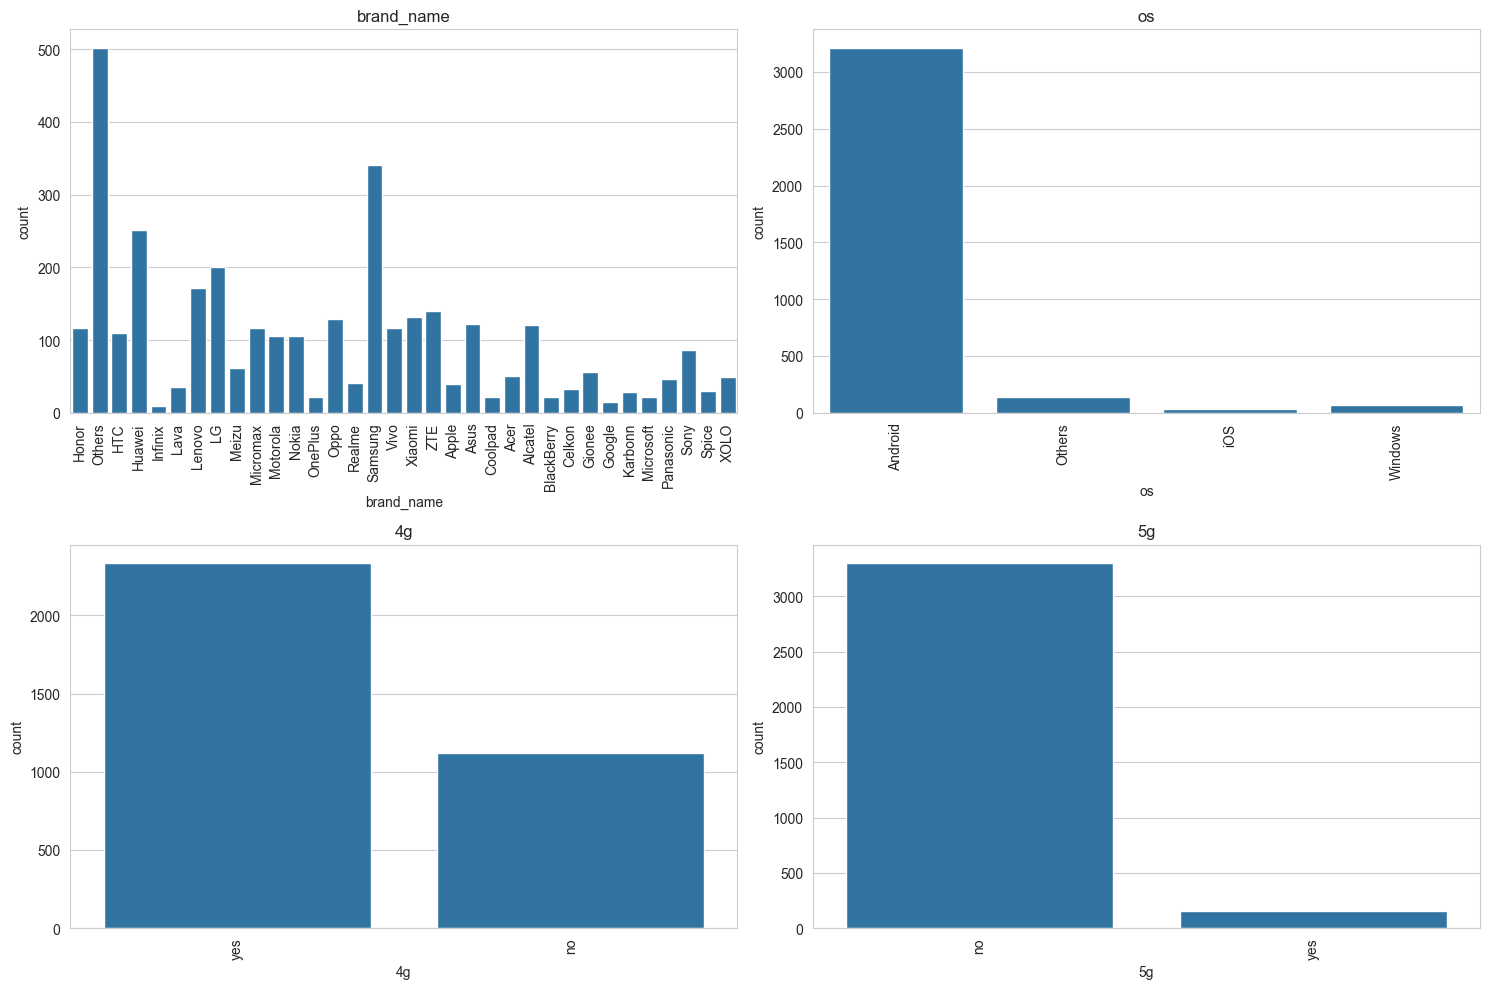

In [51]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df2.select_dtypes(include=['object', 'category']).columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df2[column])
    plt.title(column)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**NOTES:**
- Brand_name show 34 brands with very ood count number. 
- The variable "Others" is assumed include any number of brands not individualized, is the category with biggest count.
- os variable show clearly Android is the most common operative system
- 4G capable devices are around twice the non capable
- There are very few 5G capable devices
- There is a lot of outliers in many variables. Detailed analysis required.

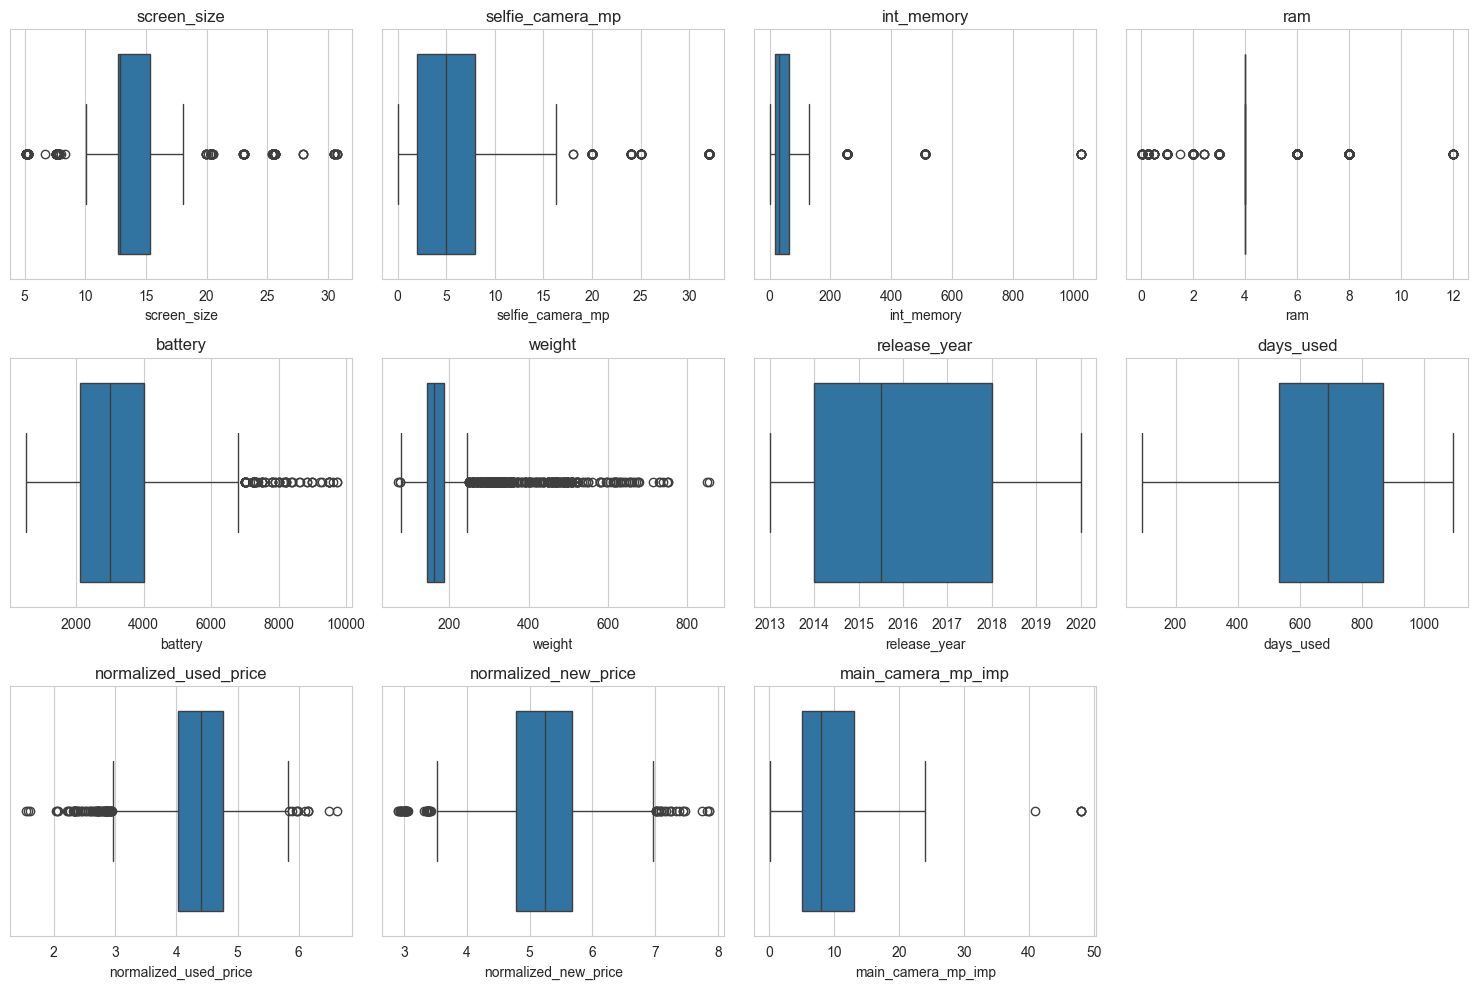

In [52]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df2.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df2[column])
    plt.title(column)
plt.tight_layout()
plt.show()

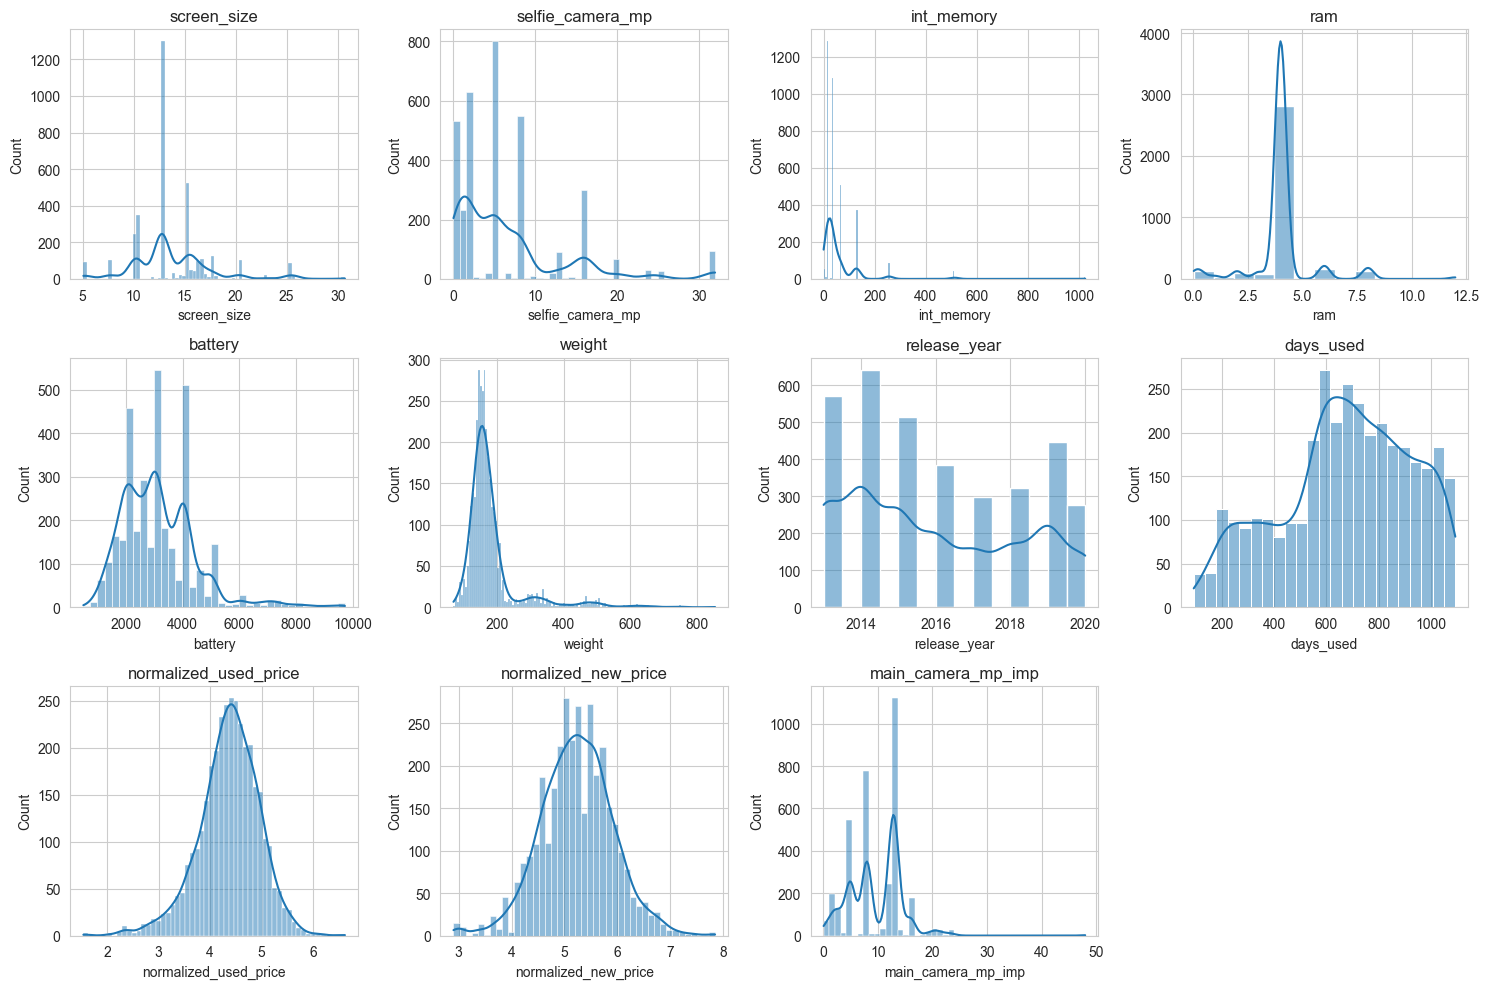

In [53]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df2.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(x=df2[column],kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

**NOTES:**
- normalized_used_price and normalized_new_price have a normal distribution as expected by variable naming
- None of the others numerical variables have normal distribution, presenting skewing and multimode distributions.

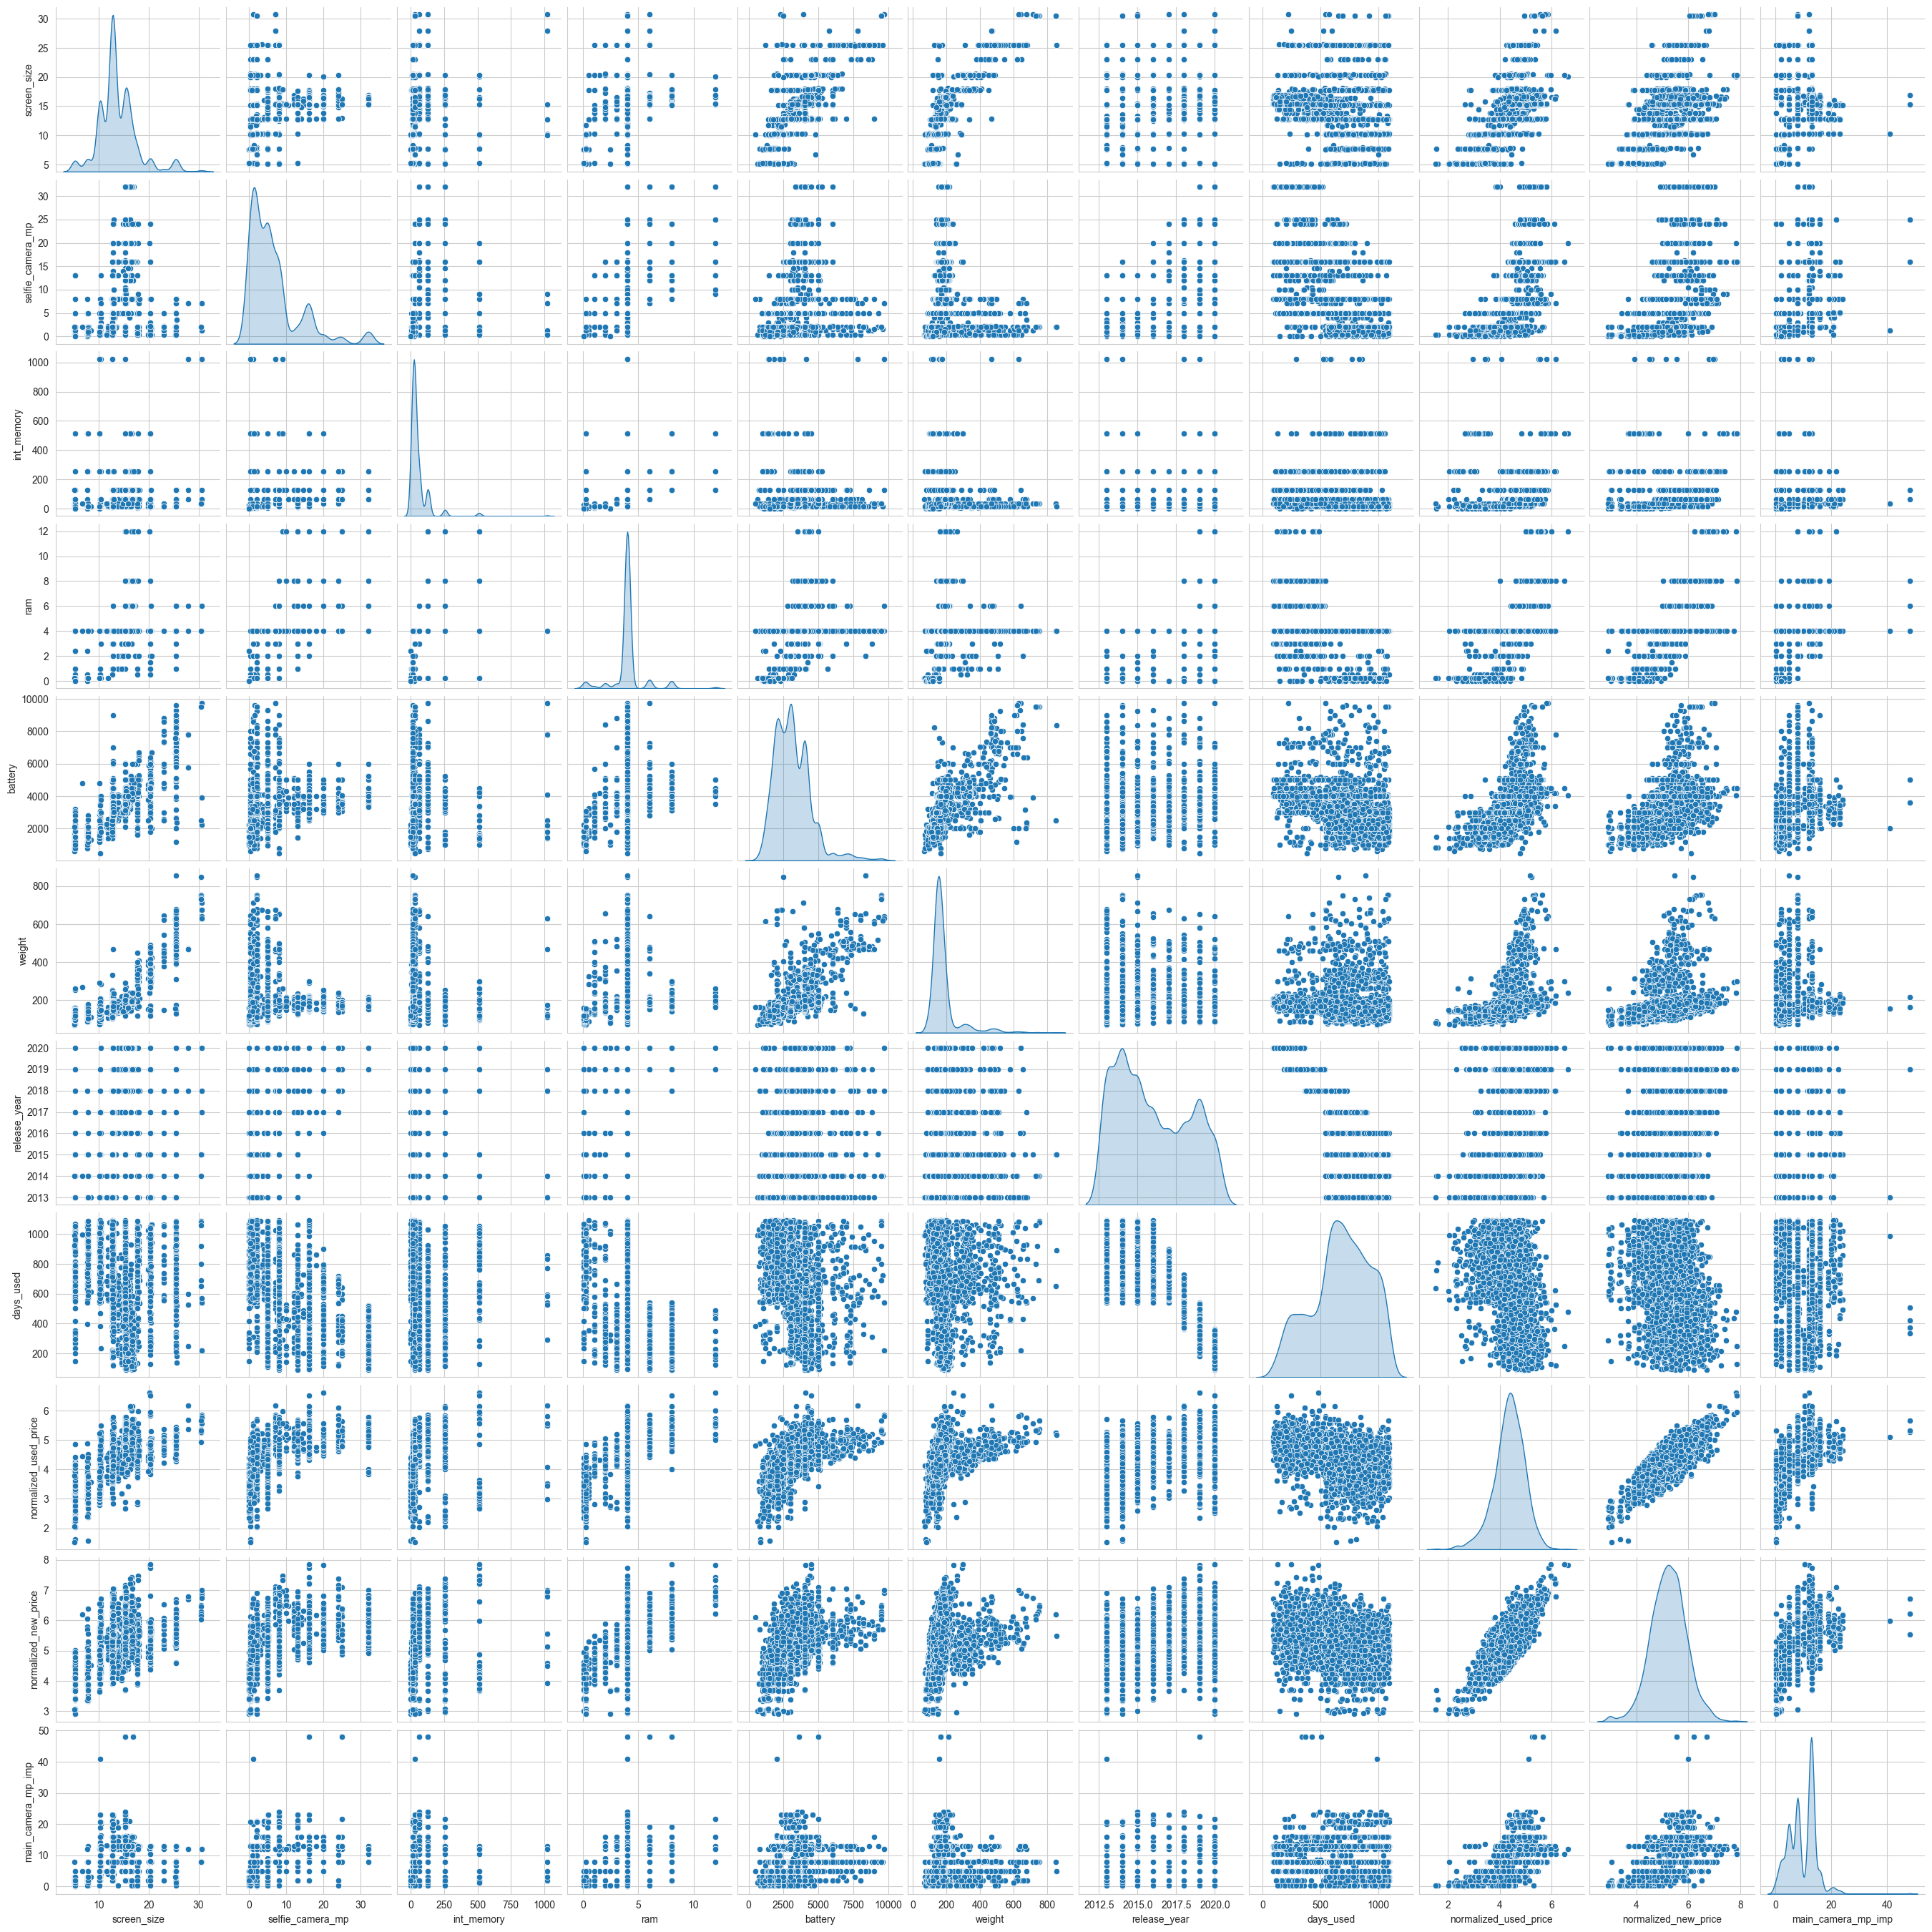

In [54]:
sns.pairplot(df2.select_dtypes(include=[np.number]),diag_kind="kde");

In [55]:
df2[df2.select_dtypes(include=np.number).columns.tolist()].corr()

screen_size  selfie_camera_mp  int_memory     ram  \
screen_size                 1.0000            0.2716      0.0719  0.2764   
selfie_camera_mp            0.2716            1.0000      0.2966  0.4781   
int_memory                  0.0719            0.2966      1.0000  0.1238   
ram                         0.2764            0.4781      0.1238  1.0000   
battery                     0.8114            0.3699      0.1184  0.2822   
weight                      0.8289           -0.0046      0.0155  0.0912   
release_year                0.3642            0.6909      0.2351  0.3128   
days_used                  -0.2917           -0.5526     -0.2423 -0.2794   
normalized_used_price       0.6148            0.6078      0.1912  0.5212   
normalized_new_price        0.4609            0.4749      0.1963  0.5329   
main_camera_mp_imp          0.1668            0.4229      0.0420  0.2631   

                       battery  weight  release_year  days_used  \
screen_size             0.8114  0.8289        0.3642    -0.2917   
selfie_camera_mp        0.3699 -0.0046        0.6909    -0.5526   
int_memory              0.1184  0.0155        0.2351    -0.2423   
ram                     0.2822  0.0912        0.3128    -0.2794   
battery                 1.0000  0.6992        0.4884    -0.3707   
weight                  0.6992  1.0000        0.0716    -0.0679   
release_year            0.4884  0.0716        1.0000    -0.7504   
days_used              -0.3707 -0.0679       -0.7504     1.0000   
normalized_used_price   0.6127  0.3826        0.5098    -0.3583   
normalized_new_price    0.4705  0.2699        0.3037    -0.2166   
main_camera_mp_imp      0.2701 -0.0828        0.3797    -0.1889   

                       normalized_used_price  normalized_new_price  \
screen_size                           0.6148                0.4609   
selfie_camera_mp                      0.6078                0.4749   
int_memory                            0.1912                0.1963   
ram                                   0.5212                0.5329   
battery                               0.6127                0.4705   
weight                                0.3826                0.2699   
release_year                          0.5098                0.3037   
days_used                            -0.3583               -0.2166   
normalized_used_price                 1.0000                0.8345   
normalized_new_price                  0.8345                1.0000   
main_camera_mp_imp                    0.5866                0.5368   

                       main_camera_mp_imp  
screen_size                        0.1668  
selfie_camera_mp                   0.4229  
int_memory                         0.0420  
ram                                0.2631  
battery                            0.2701  
weight                            -0.0828  
release_year                       0.3797  
days_used                         -0.1889  
normalized_used_price              0.5866  
normalized_new_price               0.5368  
main_camera_mp_imp                 1.0000

**NOTES:**
- normalized_used_price and normalized_new_price have high correlation (0.83)
- screen_size have high correlation with battery(0.81) and weight (0.83)


In [56]:
pd.crosstab(df2['4g'],df2['5g'],margins="all")

5g     no  yes   All
4g                  
no   1119    0  1119
yes  2183  152  2335
All  3302  152  3454

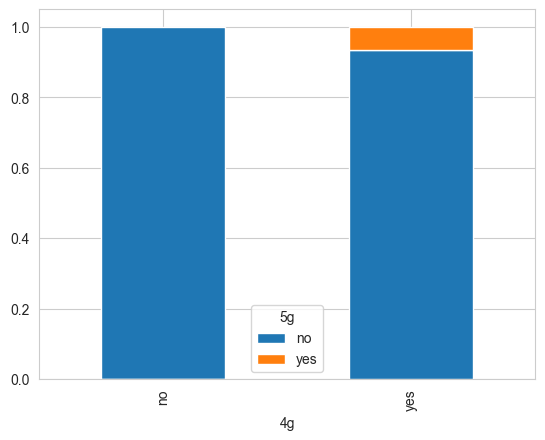

In [57]:
#tech=pd.crosstab(df['4g'],df['5g'],normalize='index')
#tech

pd.crosstab(df2['4g'],df2['5g'],normalize='index').plot.bar(stacked=True);

**NOTES:**
- Only 152 devices are both 4G and 5G compatible
- There are 1119 devices of other technologies not specified (i.e. 3G, 2G)
- 2183 devices are only 4G

#### Consolidated Notes from Exploratory Data Analysis

**Univariate Analysis. Categorical variables**
- Brand_name show 34 brands with very ood count number. 
- The variable "Others" is assumed include any number of brands not individualized, is the category with biggest count.
- os variable show clearly Android is the most common operative system
- 4G capable devices are around twice the non capable
- There are very few 5G capable devices
- There is a lot of outliers in many variables. Detailed analysis required.

**Univariate Analysis. Numerical variables**
- normalized_used_price and normalized_new_price have a normal distribution as expected by variable naming
- None of the others numerical variables have normal distribution, presenting skewing and multimode distributions.

**Bivariate Analysis. Categorical variables**
- Only 152 devices are both 4G and 5G compatible
- There are 1119 devices of other technologies not specified (i.e. 3G, 2G)
- 2183 devices are only 4G

**Bivariate Analysis. Numerical variables**
- normalized_used_price and normalized_new_price have high correlation (0.83)
- screen_size have high correlation with battery(0.81) and weight (0.83)

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

#### Answers

1. The distribution of normalized used device prices looks **similar to a normal distribution, left skewed.**
2. **Andoid os represents 93%** of used device market.
3. The amount of RAM per device varies from 0 to 12, whith **mean of 4Mb** and **std of 1.37**. This distribution is quite similar across all device brands with some exceptions.
4. The weight of devices with large batteries have a **multimode, right skewed distribution**, with values between 118 and 855 grams, with a mean of 332 grams
5. **31.8% of devices** have a screen size larger than 6 inches (1099 out of 3454)
6. There are 655 devices with large selfie cameras, distrbuted on 25 brands, being the most popular brand "Huawei" with 87 units. The distribution is **multimodal**.
7. **normalized_new_price (0.83)** is the attribute with higher correlation with normalized_used_price, followed by screen_size, battery and selfie_camera_mp (0.61) and main_camera_mp_imp (0.59).


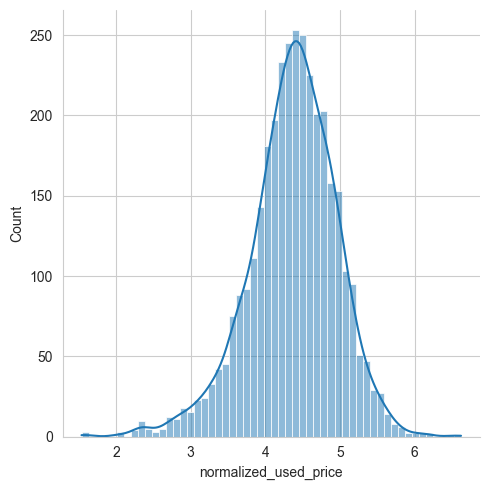

In [58]:
#1. What does the distribution of normalized used device prices look like?
sns.displot(data=df2, x="normalized_used_price", kde=True);

**Answers**:

1. The distribution of normalized used device prices looks **similar to a normal distribution, left skewed.**


In [59]:
# 2.What percentage of the used device market is dominated by Android devices?
df2['os'].value_counts(normalize=True)

Android   0.9305
Others    0.0397
Windows   0.0194
iOS       0.0104
Name: os, dtype: float64

**Answers**:

2. **Andoid os represents 93%** of used device market.


In [60]:
#3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
df2['ram'].describe()

count   3454.0000
mean       4.0343
std        1.3654
min        0.0200
25%        4.0000
50%        4.0000
75%        4.0000
max       12.0000
Name: ram, dtype: float64

In [61]:
#3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
cum_ram=df2.groupby('brand_name')['ram'].describe().sort_values(by='count', ascending=False)
cum_ram['cum_count']=cum_ram['count'].cumsum()
cum_ram['cum_pct']=cum_ram['cum_count']/cum_ram['count'].sum()
cum_ram

count   mean    std    min    25%    50%    75%     max  \
brand_name                                                              
Others     502.0000 3.7779 1.0158 0.2500 4.0000 4.0000 4.0000  8.0000   
Samsung    341.0000 4.1994 1.3771 0.2500 4.0000 4.0000 4.0000 12.0000   
Huawei     251.0000 4.6554 1.5954 0.2500 4.0000 4.0000 4.0000 12.0000   
LG         201.0000 3.9366 1.0765 0.2500 4.0000 4.0000 4.0000  8.0000   
Lenovo     171.0000 3.8860 0.7742 0.2500 4.0000 4.0000 4.0000  6.0000   
ZTE        140.0000 4.0232 0.9095 0.2500 4.0000 4.0000 4.0000  8.0000   
Xiaomi     132.0000 4.5833 1.5085 2.0000 4.0000 4.0000 4.0000 12.0000   
Oppo       129.0000 4.9612 2.1228 1.0000 4.0000 4.0000 6.0000 12.0000   
Asus       122.0000 4.0492 0.6010 2.0000 4.0000 4.0000 4.0000  8.0000   
Alcatel    121.0000 3.4070 1.2637 0.2500 4.0000 4.0000 4.0000  4.0000   
Vivo       117.0000 4.7564 1.6382 0.5000 4.0000 4.0000 4.0000  8.0000   
Micromax   117.0000 3.6795 1.0529 0.2500 4.0000 4.0000 4.0000  4.0000   
Honor      116.0000 4.6034 1.6252 2.0000 4.0000 4.0000 6.0000  8.0000   
HTC        110.0000 4.0000 0.3318 3.0000 4.0000 4.0000 4.0000  6.0000   
Nokia      106.0000 2.4203 1.8530 0.0200 0.0300 3.5000 4.0000  6.0000   
Motorola   106.0000 3.9434 1.3297 2.0000 4.0000 4.0000 4.0000 12.0000   
Sony        86.0000 4.0698 0.4800 4.0000 4.0000 4.0000 4.0000  8.0000   
Meizu       62.0000 4.4516 1.2238 2.0000 4.0000 4.0000 4.0000  8.0000   
Gionee      56.0000 3.9330 0.5011 0.2500 4.0000 4.0000 4.0000  4.0000   
Acer        51.0000 3.9020 0.5002 1.0000 4.0000 4.0000 4.0000  4.0000   
XOLO        49.0000 4.0000 0.0000 4.0000 4.0000 4.0000 4.0000  4.0000   
Panasonic   47.0000 4.0000 0.0000 4.0000 4.0000 4.0000 4.0000  4.0000   
Realme      41.0000 4.1951 1.3270 2.0000 3.0000 4.0000 6.0000  6.0000   
Apple       39.0000 4.0000 0.6070 2.0000 4.0000 4.0000 4.0000  6.0000   
Lava        36.0000 3.2778 1.4139 0.2500 4.0000 4.0000 4.0000  4.0000   
Celkon      33.0000 1.6136 1.8319 0.2500 0.2500 0.2500 4.0000  4.0000   
Spice       30.0000 3.7500 0.9514 0.2500 4.0000 4.0000 4.0000  4.0000   
Karbonn     29.0000 3.3534 1.4416 0.2500 4.0000 4.0000 4.0000  4.0000   
Microsoft   22.0000 4.0000 0.0000 4.0000 4.0000 4.0000 4.0000  4.0000   
OnePlus     22.0000 6.3636 2.5920 4.0000 4.0000 6.0000 8.0000 12.0000   
Coolpad     22.0000 3.9545 0.2132 3.0000 4.0000 4.0000 4.0000  4.0000   
BlackBerry  22.0000 3.8295 0.7995 0.2500 4.0000 4.0000 4.0000  4.0000   
Google      15.0000 4.5333 0.9155 4.0000 4.0000 4.0000 5.0000  6.0000   
Infinix     10.0000 2.6000 0.8433 2.0000 2.0000 2.0000 3.0000  4.0000   

            cum_count  cum_pct  
brand_name                      
Others       502.0000   0.1453  
Samsung      843.0000   0.2441  
Huawei      1094.0000   0.3167  
LG          1295.0000   0.3749  
Lenovo      1466.0000   0.4244  
ZTE         1606.0000   0.4650  
Xiaomi      1738.0000   0.5032  
Oppo        1867.0000   0.5405  
Asus        1989.0000   0.5759  
Alcatel     2110.0000   0.6109  
Vivo        2227.0000   0.6448  
Micromax    2344.0000   0.6786  
Honor       2460.0000   0.7122  
HTC         2570.0000   0.7441  
Nokia       2676.0000   0.7748  
Motorola    2782.0000   0.8054  
Sony        2868.0000   0.8303  
Meizu       2930.0000   0.8483  
Gionee      2986.0000   0.8645  
Acer        3037.0000   0.8793  
XOLO        3086.0000   0.8935  
Panasonic   3133.0000   0.9071  
Realme      3174.0000   0.9189  
Apple       3213.0000   0.9302  
Lava        3249.0000   0.9406  
Celkon      3282.0000   0.9502  
Spice       3312.0000   0.9589  
Karbonn     3341.0000   0.9673  
Microsoft   3363.0000   0.9737  
OnePlus     3385.0000   0.9800  
Coolpad     3407.0000   0.9864  
BlackBerry  3429.0000   0.9928  
Google      3444.0000   0.9971  
Infinix     3454.0000   1.0000

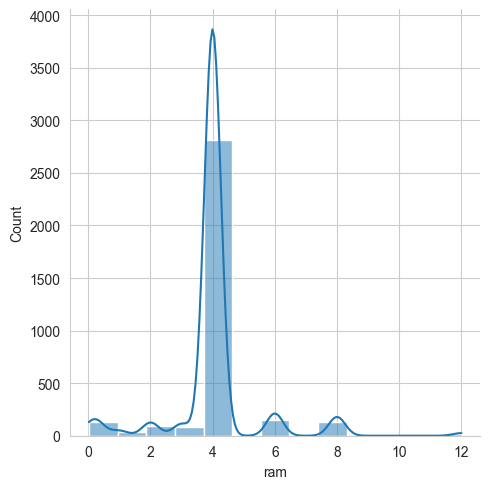

In [62]:
sns.displot(df2, x="ram", kde=True);

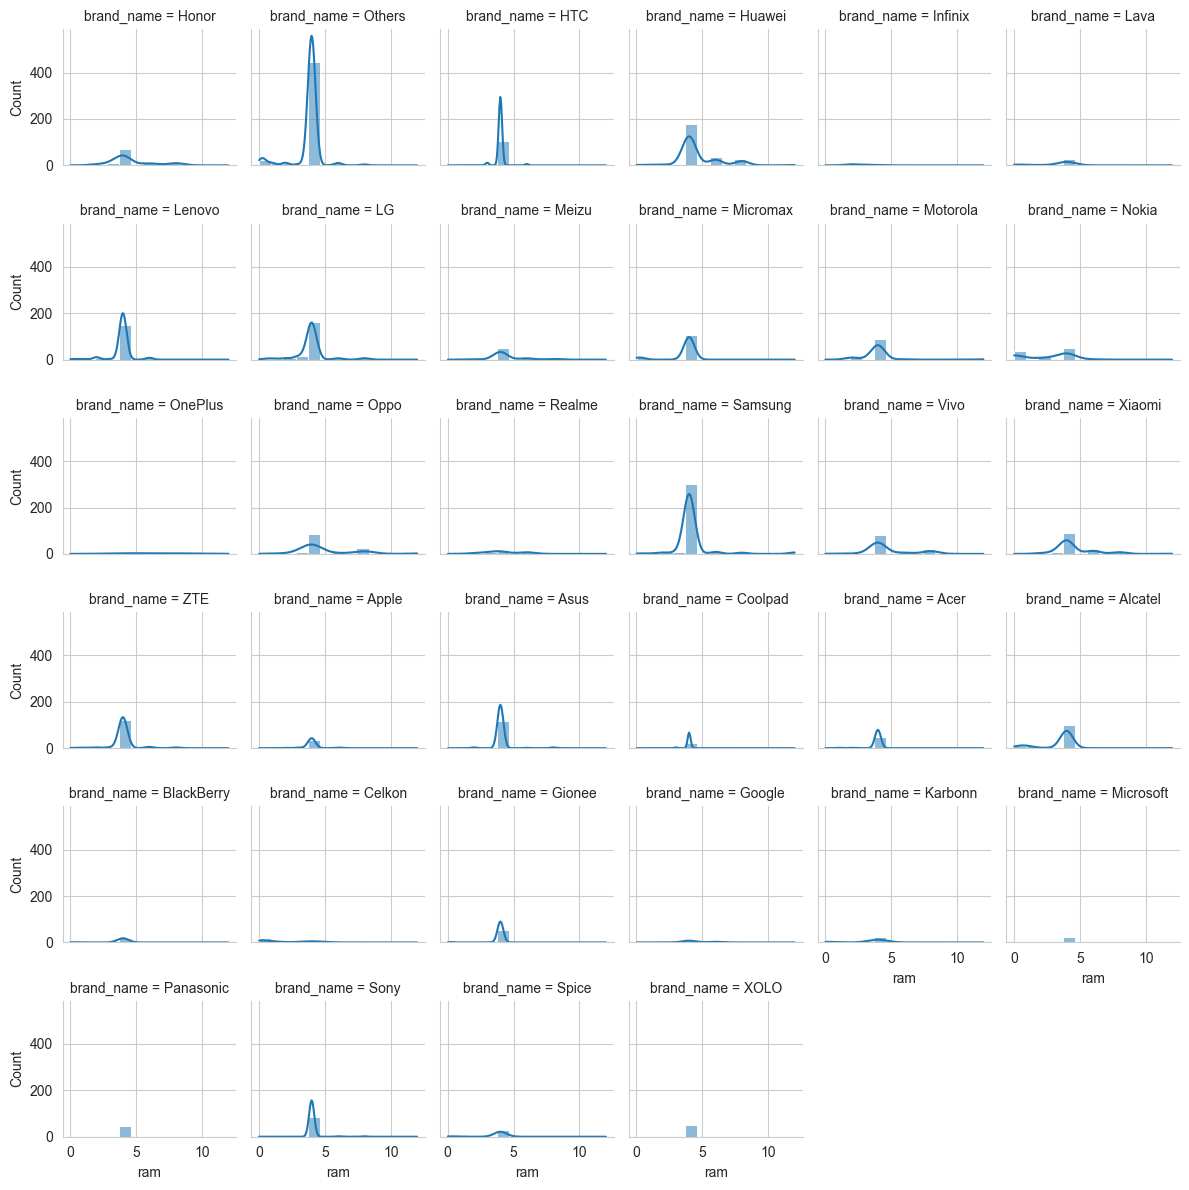

In [63]:
sns.displot(
    data=df2, 
    x="ram", 
    col="brand_name", 
    kde=True, 
    col_wrap=6, 
    height=2, 
    aspect=1
);

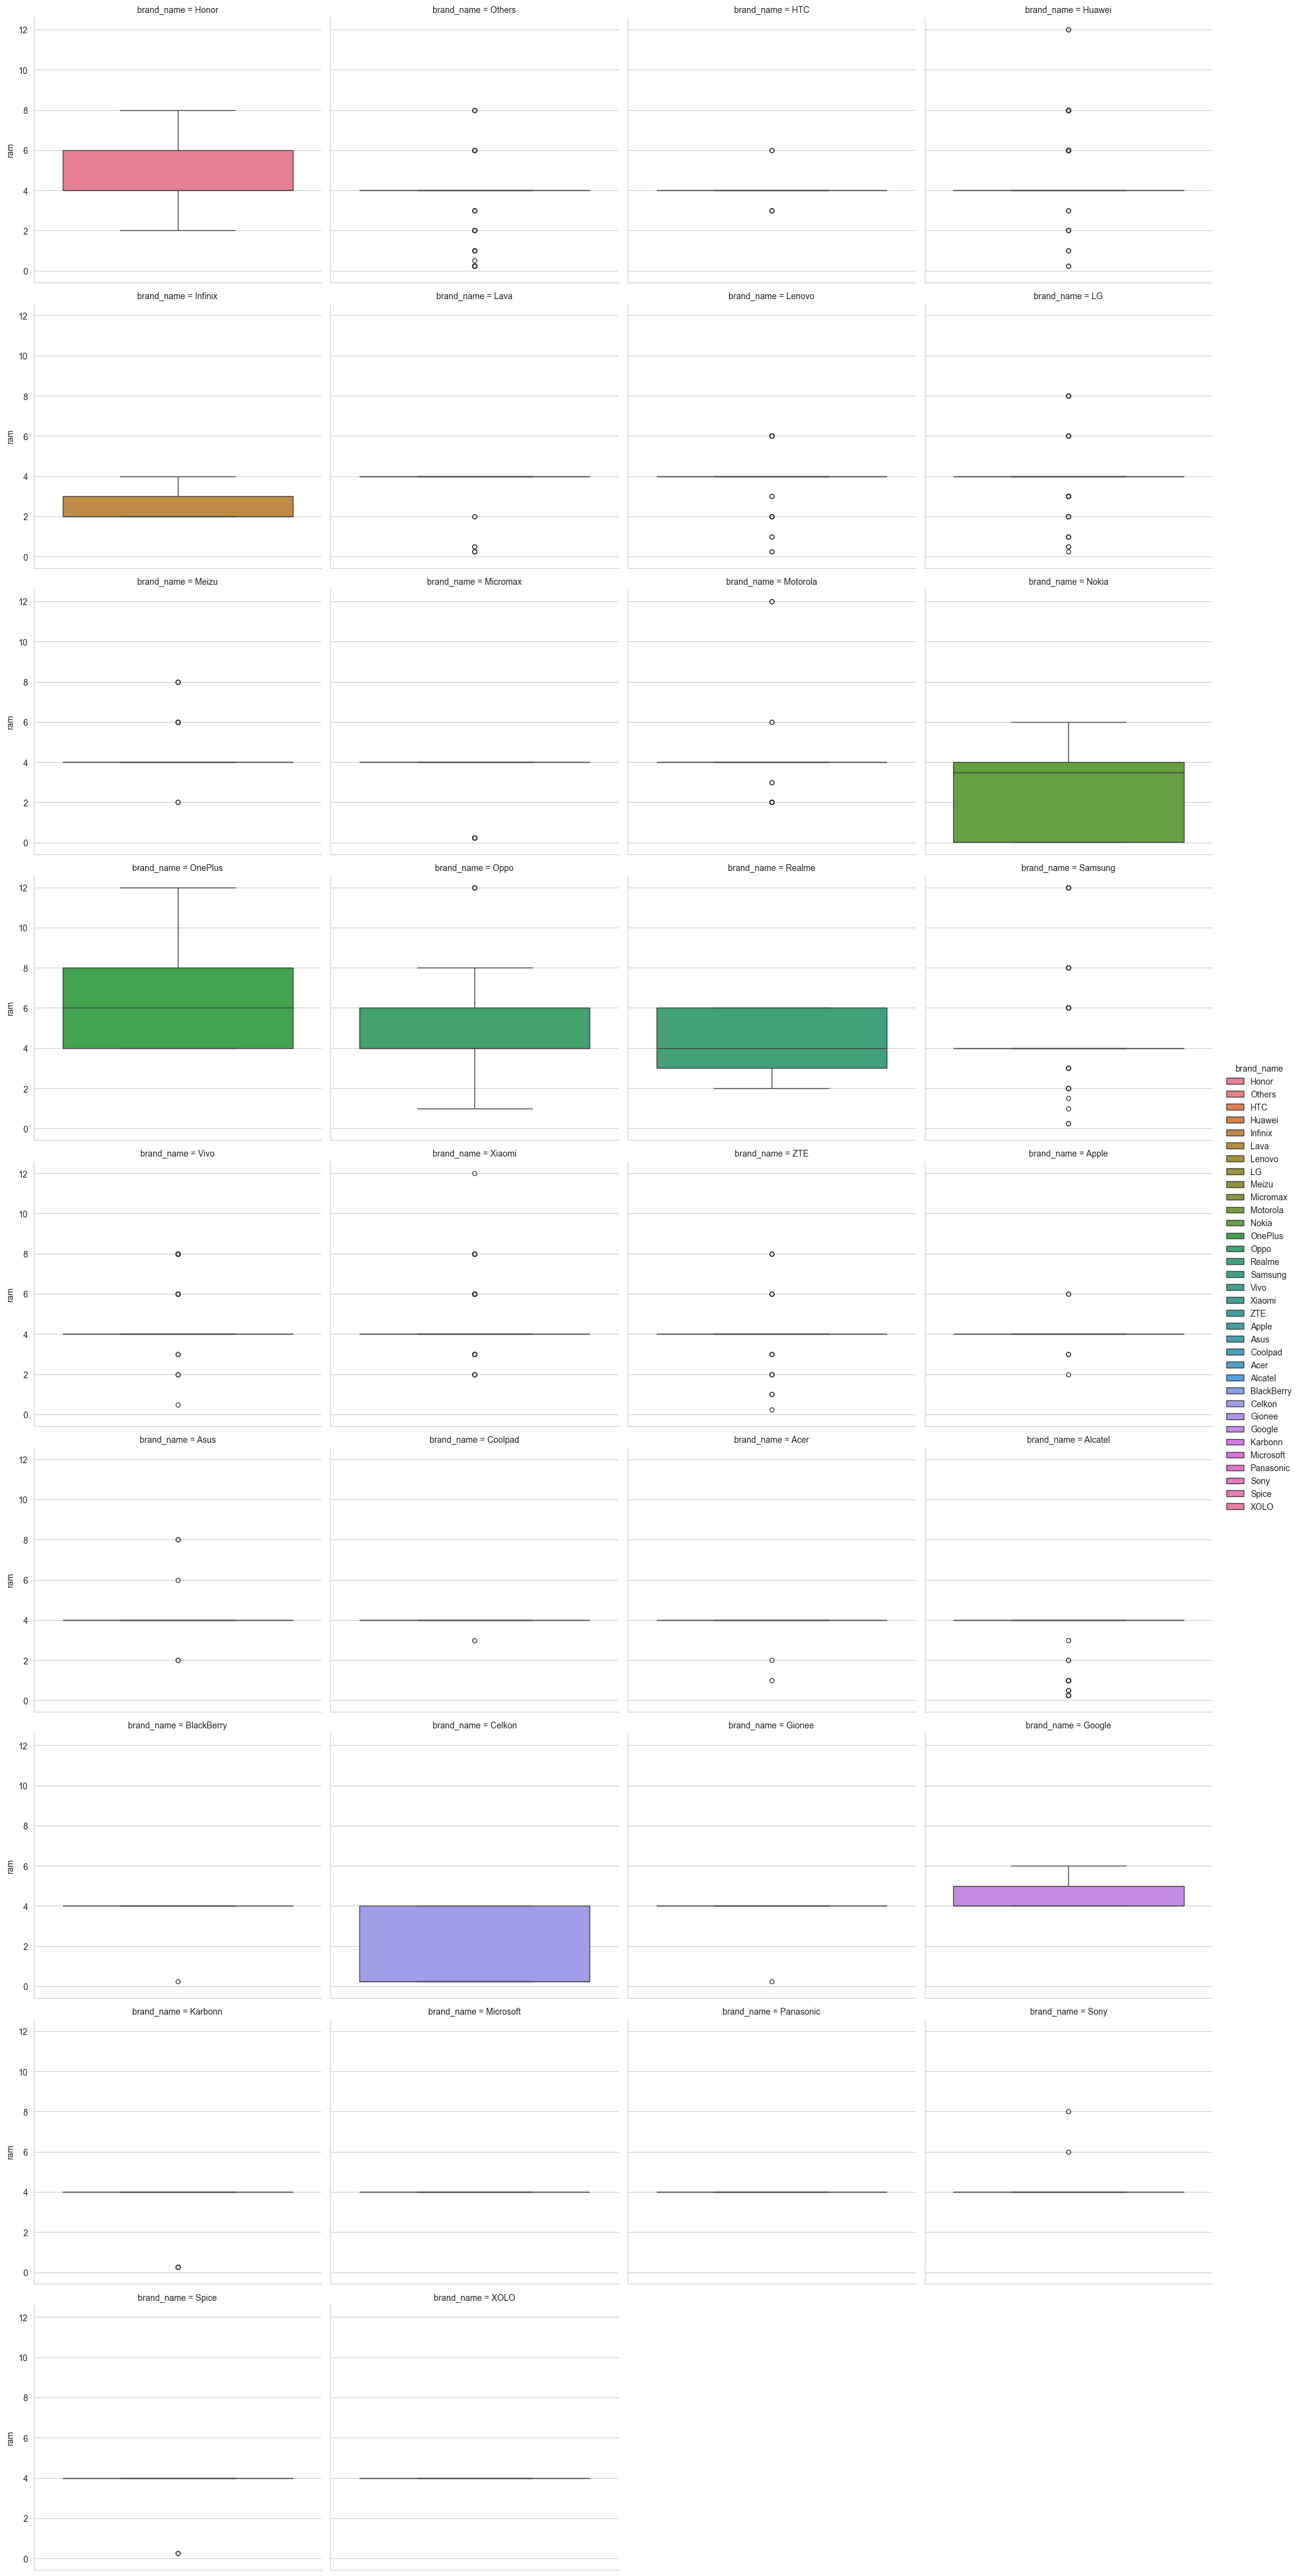

In [64]:
sns.catplot(data=df2, y="ram", hue="brand_name", kind="box", col="brand_name", col_wrap=4);

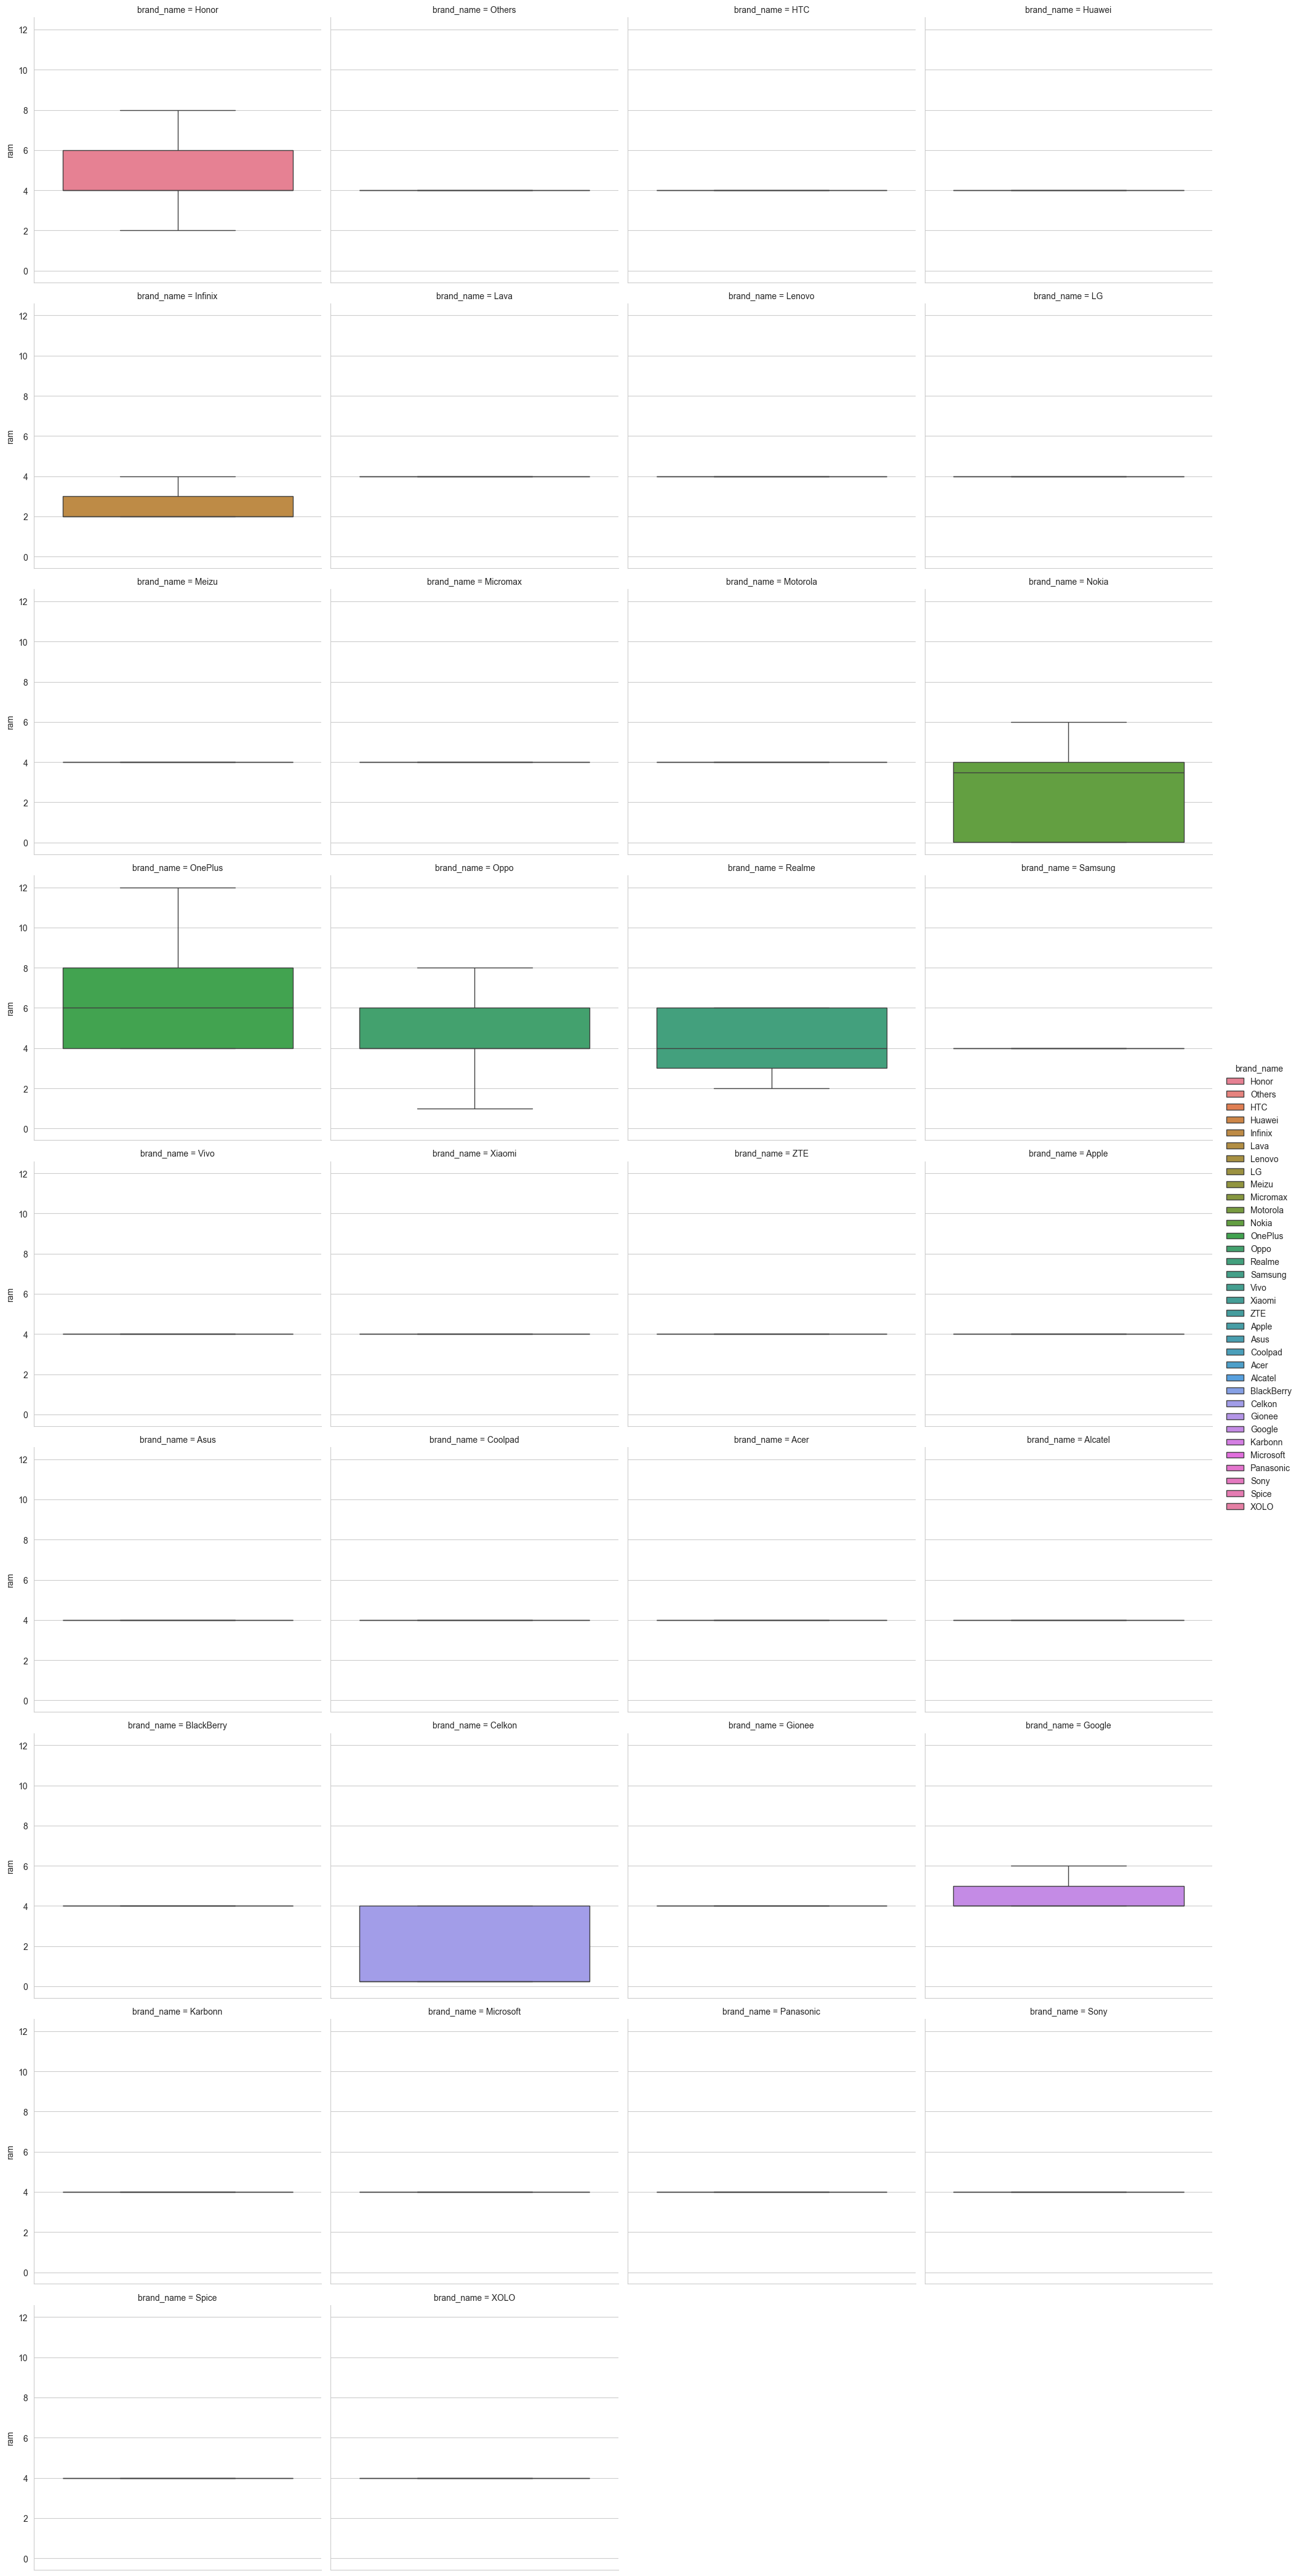

In [65]:
sns.catplot(data=df2, y="ram", hue="brand_name", kind="box", col="brand_name", showfliers=False, col_wrap=4);

**Answers**
3. The amount of RAM per device varies from 0 to 12, whith **mean of 4Mb** and **std of 1.37**. This distribution is quite similar across all device brands with some exceptions.


In [66]:
# 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. 
# How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
df2[df2['battery']>4500]['weight'].describe()

count   341.0000
mean    332.2757
std     155.5018
min     118.0000
25%     198.0000
50%     300.0000
75%     467.0000
max     855.0000
Name: weight, dtype: float64

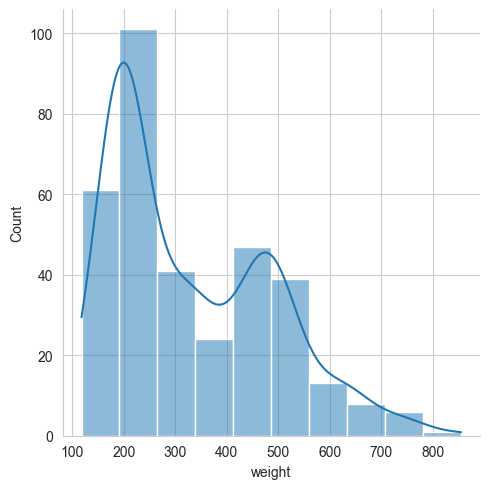

In [67]:
sns.displot(data=df2[df2['battery']>4500], x='weight', kde=True);

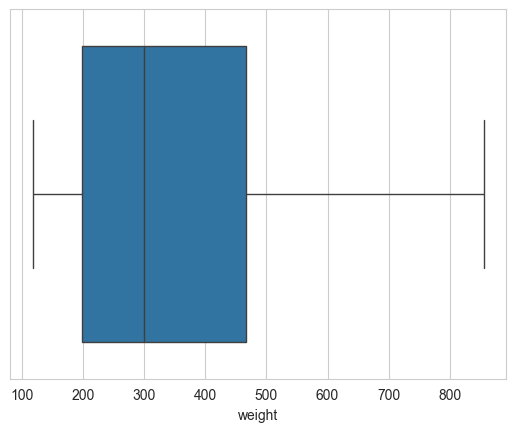

In [68]:
sns.boxplot(data=df2[df2['battery']>4500], x='weight');

**Answers**:

4. The weight of devices with large batteries have a **multimode, right skewed distribution**, with values between 118 and 855 grams, with a mean of 332 grams


In [69]:
# 5.Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. 
# How many phones and tablets are available across different brands with a screen size larger than 6 inches?
pd.DataFrame({'count_all':df2['brand_name'].value_counts(),'count_large':df2[df2['screen_size']>6*2.54]['brand_name'].value_counts()}).sort_values(by='count_large', ascending=False)

count_all  count_large
Huawei            251     149.0000
Samsung           341     119.0000
Others            502      99.0000
Vivo              117      80.0000
Honor             116      72.0000
Oppo              129      70.0000
Xiaomi            132      69.0000
Lenovo            171      69.0000
LG                201      59.0000
Motorola          106      42.0000
Asus              122      41.0000
Realme             41      40.0000
Alcatel           121      26.0000
Apple              39      24.0000
Acer               51      19.0000
ZTE               140      17.0000
Meizu              62      17.0000
OnePlus            22      16.0000
Nokia             106      15.0000
Sony               86      12.0000
Infinix            10      10.0000
HTC               110       7.0000
Micromax          117       7.0000
Google             15       4.0000
Gionee             56       3.0000
XOLO               49       3.0000
Coolpad            22       3.0000
Karbonn            29       2.0000
Panasonic          47       2.0000
Spice              30       2.0000
Microsoft          22       1.0000
BlackBerry         22          NaN
Celkon             33          NaN
Lava               36          NaN

In [70]:
df2[df2['screen_size']>6*2.54]['brand_name'].value_counts().sum()

1099

In [71]:
df2.shape[0]

3454

In [72]:
df2[df2['screen_size']>6*2.54]['brand_name'].value_counts().sum()/df2.shape[0]

0.3181818181818182

**Answers**:

5. **31.8% of devices** have a screen size larger than 6 inches (1099 out of 3454)


In [73]:
#6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. 
# What is the distribution of devices offering greater than 8MP selfie cameras across brands?
df2[df2['selfie_camera_mp']>8]['brand_name'].value_counts()

Huawei        87
Vivo          78
Oppo          75
Xiaomi        63
Samsung       57
Honor         41
Others        34
LG            32
Motorola      26
Meizu         24
HTC           20
ZTE           20
Realme        18
OnePlus       18
Lenovo        14
Sony          14
Nokia         10
Asus           6
Infinix        4
Gionee         4
Coolpad        3
BlackBerry     2
Micromax       2
Panasonic      2
Acer           1
Name: brand_name, dtype: int64

In [74]:
df2[df2['selfie_camera_mp']>8]['brand_name'].describe()

count        655
unique        25
top       Huawei
freq          87
Name: brand_name, dtype: object

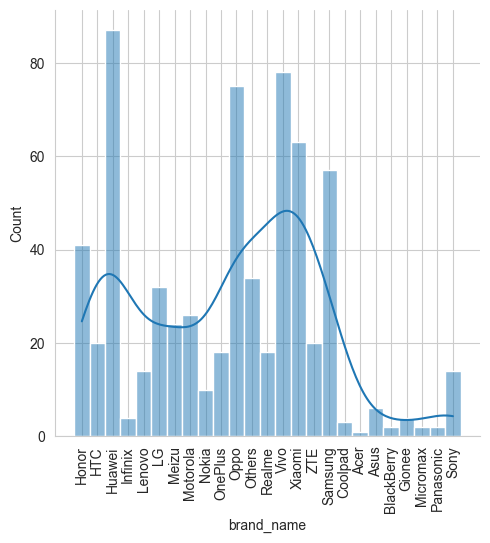

In [75]:
sns.displot(data=df2[df2['selfie_camera_mp']>8], x='brand_name', kde=True);
plt.xticks(rotation=90)
plt.show()

**Answers**:

6. There are 655 devices with large selfie cameras, distrbuted on 25 brands, being the most popular brand "Huawei" with 87 units. The distribution is **multimodal**.

In [76]:
# 7. Which attributes are highly correlated with the normalized price of a used device?
df2[df2.select_dtypes(include=np.number).columns.tolist()].corr()['normalized_used_price'].sort_values(ascending=False)

normalized_used_price    1.0000
normalized_new_price     0.8345
screen_size              0.6148
battery                  0.6127
selfie_camera_mp         0.6078
main_camera_mp_imp       0.5866
ram                      0.5212
release_year             0.5098
weight                   0.3826
int_memory               0.1912
days_used               -0.3583
Name: normalized_used_price, dtype: float64

**Answers**:

7. **normalized_new_price (0.83)** is the attribute with higher correlation with normalized_used_price, followed by screen_size, battery and selfie_camera_mp (0.61) and main_camera_mp_imp (0.59).

## Data Preprocessing

- Outlier detection and treatment (if needed)
- Feature engineering
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**NOTES:**
- From visualization it was noticed there is a lot of outliers in many variables. Detailed analysis required. 


In [77]:
for column in df2.select_dtypes(include=np.number).columns:
    outliers=len(df2[(df2[column] < df2[column].quantile(0.25)-1.5*(df2[column].quantile(0.75)-df2[column].quantile(0.25))) | (df2[column] > df2[column].quantile(0.75)+1.5*(df2[column].quantile(0.75)-df2[column].quantile(0.25)))][column])
    print(f'{column}: {outliers} outliers')

screen_size: 450 outliers
selfie_camera_mp: 221 outliers
int_memory: 138 outliers
ram: 639 outliers
battery: 77 outliers
weight: 368 outliers
release_year: 0 outliers
days_used: 0 outliers
normalized_used_price: 85 outliers
normalized_new_price: 66 outliers
main_camera_mp_imp: 5 outliers


**NOTES:**
- Quantified outliers is noticed only two variables have no outliers, while the rest have up to 639 (18% of samples). 


In [78]:
df3=df2[(np.abs(df2.select_dtypes(include=np.number).apply(zscore))<3).all(axis=1)]
df3

brand_name       os  screen_size   4g   5g  selfie_camera_mp  int_memory  \
0         Honor  Android      14.5000  yes   no            5.0000     64.0000   
1         Honor  Android      17.3000  yes  yes           16.0000    128.0000   
2         Honor  Android      16.6900  yes  yes            8.0000    128.0000   
4         Honor  Android      15.3200  yes   no            8.0000     64.0000   
5         Honor  Android      16.2300  yes   no            8.0000     64.0000   
...         ...      ...          ...  ...  ...               ...         ...   
3449       Asus  Android      15.3400  yes   no            8.0000     64.0000   
3450       Asus  Android      15.2400  yes   no            8.0000    128.0000   
3451    Alcatel  Android      15.8000  yes   no            5.0000     32.0000   
3452    Alcatel  Android      15.8000  yes   no            5.0000     32.0000   
3453    Alcatel  Android      12.8300  yes   no            5.0000     16.0000   

        ram   battery   weight  release_year  days_used  \
0    3.0000 3020.0000 146.0000          2020        127   
1    8.0000 4300.0000 213.0000          2020        325   
2    8.0000 4200.0000 213.0000          2020        162   
4    3.0000 5000.0000 185.0000          2020        293   
5    4.0000 4000.0000 176.0000          2020        223   
...     ...       ...      ...           ...        ...   
3449 6.0000 5000.0000 190.0000          2019        232   
3450 8.0000 4000.0000 200.0000          2018        541   
3451 3.0000 4000.0000 165.0000          2020        201   
3452 2.0000 4000.0000 160.0000          2020        149   
3453 2.0000 4000.0000 168.0000          2020        176   

      normalized_used_price  normalized_new_price  main_camera_mp_imp  
0                    4.3076                4.7151             13.0000  
1                    5.1621                5.5190             13.0000  
2                    5.1111                5.8846             13.0000  
4                    4.3900                4.9478             13.0000  
5                    4.4139                5.0607             13.0000  
...                     ...                   ...                 ...  
3449                 4.4923                6.4839             14.7778  
3450                 5.0377                6.2515             13.0000  
3451                 4.3573                4.5288             13.0000  
3452                 4.3498                4.6242             13.0000  
3453                 4.1321                4.2800             13.0000  

[3111 rows x 15 columns]

In [79]:
df2.shape[0]-df3.shape[0]

343

**NOTES:**
- Outliers will be removed using Z-Score Method, considering outliers all data points with z-score greater than 3 or less than -3.
- A total of 343 rows removed from dataframe as considered outliers.


In [80]:
for column in df3.select_dtypes(include=np.number).columns:
    df3[column]=np.clip(df3[column], df3[column].quantile(0.25)-1.5*(df3[column].quantile(0.75)-df3[column].quantile(0.25)), df3[column].quantile(0.75)+1.5*(df2[column].quantile(0.75)-df2[column].quantile(0.25)))

In [81]:
for column in df3.select_dtypes(include=np.number).columns:
    outliers=len(df3[(df3[column] < df3[column].quantile(0.25)-1.5*(df3[column].quantile(0.75)-df3[column].quantile(0.25))) | (df3[column] > df3[column].quantile(0.75)+1.5*(df2[column].quantile(0.75)-df2[column].quantile(0.25)))][column])
    print(f'{column}: {outliers} outliers')

screen_size: 0 outliers
selfie_camera_mp: 0 outliers
int_memory: 0 outliers
ram: 0 outliers
battery: 0 outliers
weight: 0 outliers
release_year: 0 outliers
days_used: 0 outliers
normalized_used_price: 0 outliers
normalized_new_price: 0 outliers
main_camera_mp_imp: 0 outliers


**NOTES:**
- The clip function of NumPy is aplied to set all the values smaller than lower_whisker will be assigned the value of lower_whisker, and all the values greater than upper_whisker will be assigned the value of upper_whisker.

In [82]:
df3['release_year'].value_counts()

2014    594
2015    494
2013    489
2016    371
2019    354
2018    303
2017    288
2020    218
Name: release_year, dtype: int64

In [83]:
df3['years_old']=2024-df3['release_year']

In [84]:
df3.drop('release_year', axis=1, inplace=True)

In [85]:
df3.head()

brand_name       os  screen_size   4g   5g  selfie_camera_mp  int_memory  \
0      Honor  Android      14.5000  yes   no            5.0000     64.0000   
1      Honor  Android      17.3000  yes  yes           16.0000    128.0000   
2      Honor  Android      16.6900  yes  yes            8.0000    128.0000   
4      Honor  Android      15.3200  yes   no            8.0000     64.0000   
5      Honor  Android      16.2300  yes   no            8.0000     64.0000   

     ram   battery   weight  days_used  normalized_used_price  \
0 4.0000 3020.0000 146.0000        127                 4.3076   
1 4.0000 4300.0000 213.0000        325                 5.1621   
2 4.0000 4200.0000 213.0000        162                 5.1111   
4 4.0000 5000.0000 185.0000        293                 4.3900   
5 4.0000 4000.0000 176.0000        223                 4.4139   

   normalized_new_price  main_camera_mp_imp  years_old  
0                4.7151             13.0000          4  
1                5.5190             13.0000          4  
2                5.8846             13.0000          4  
4                4.9478             13.0000          4  
5                5.0607             13.0000          4

In [86]:
df3['tech_4G5G']=((df3['4g']=="yes")&(df3['5g']=="yes")).astype(int)

In [87]:
df3['tech_4G']=((df3['4g']=="yes")&(df3['5g']=="no")).astype(int)

In [88]:
df3['tech_2G3G']=((df3['4g']=="no")&(df3['5g']=="no")).astype(int)

In [89]:
df3.drop('4g', axis=1, inplace=True)

In [90]:
df3.drop('5g', axis=1, inplace=True)

In [91]:
df3.head()

brand_name       os  screen_size  selfie_camera_mp  int_memory    ram  \
0      Honor  Android      14.5000            5.0000     64.0000 4.0000   
1      Honor  Android      17.3000           16.0000    128.0000 4.0000   
2      Honor  Android      16.6900            8.0000    128.0000 4.0000   
4      Honor  Android      15.3200            8.0000     64.0000 4.0000   
5      Honor  Android      16.2300            8.0000     64.0000 4.0000   

    battery   weight  days_used  normalized_used_price  normalized_new_price  \
0 3020.0000 146.0000        127                 4.3076                4.7151   
1 4300.0000 213.0000        325                 5.1621                5.5190   
2 4200.0000 213.0000        162                 5.1111                5.8846   
4 5000.0000 185.0000        293                 4.3900                4.9478   
5 4000.0000 176.0000        223                 4.4139                5.0607   

   main_camera_mp_imp  years_old  tech_4G5G  tech_4G  tech_2G3G  
0             13.0000          4          0        1          0  
1             13.0000          4          1        0          0  
2             13.0000          4          1        0          0  
4             13.0000          4          0        1          0  
5             13.0000          4          0        1          0

**NOTES:**
- Created variable years_old to faster qualification by age
- Created technology variable to clasify devices by technology or combination of technologies among: 4G, 4G5G, 2G3G. Is asumed devices not 4G neither 5G are 2G and/or 3G and labeled 2G3G. 5G only is descarted as already observed there are no devices in this category.
- Technology variables created as dummy variabl.s


In [92]:
df3 = pd.get_dummies(df3, columns=['brand_name','os'], drop_first=True)
df3

screen_size  selfie_camera_mp  int_memory    ram   battery   weight  \
0         14.5000            5.0000     64.0000 4.0000 3020.0000 146.0000   
1         17.3000           16.0000    128.0000 4.0000 4300.0000 213.0000   
2         16.6900            8.0000    128.0000 4.0000 4200.0000 213.0000   
4         15.3200            8.0000     64.0000 4.0000 5000.0000 185.0000   
5         16.2300            8.0000     64.0000 4.0000 4000.0000 176.0000   
...           ...               ...         ...    ...       ...      ...   
3449      15.3400            8.0000     64.0000 4.0000 5000.0000 190.0000   
3450      15.2400            8.0000    128.0000 4.0000 4000.0000 200.0000   
3451      15.8000            5.0000     32.0000 4.0000 4000.0000 165.0000   
3452      15.8000            5.0000     32.0000 4.0000 4000.0000 160.0000   
3453      12.8300            5.0000     16.0000 4.0000 4000.0000 168.0000   

      days_used  normalized_used_price  normalized_new_price  \
0           127                 4.3076                4.7151   
1           325                 5.1621                5.5190   
2           162                 5.1111                5.8846   
4           293                 4.3900                4.9478   
5           223                 4.4139                5.0607   
...         ...                    ...                   ...   
3449        232                 4.4923                6.4839   
3450        541                 5.0377                6.2515   
3451        201                 4.3573                4.5288   
3452        149                 4.3498                4.6242   
3453        176                 4.1321                4.2800   

      main_camera_mp_imp  ...  brand_name_Samsung  brand_name_Sony  \
0                13.0000  ...                   0                0   
1                13.0000  ...                   0                0   
2                13.0000  ...                   0                0   
4                13.0000  ...                   0                0   
5                13.0000  ...                   0                0   
...                  ...  ...                 ...              ...   
3449             14.7778  ...                   0                0   
3450             13.0000  ...                   0                0   
3451             13.0000  ...                   0                0   
3452             13.0000  ...                   0                0   
3453             13.0000  ...                   0                0   

      brand_name_Spice  brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  \
0                    0                0                0                  0   
1                    0                0                0                  0   
2                    0                0                0                  0   
4                    0                0                0                  0   
5                    0                0                0                  0   
...                ...              ...              ...                ...   
3449                 0                0                0                  0   
3450                 0                0                0                  0   
3451                 0                0                0                  0   
3452                 0                0                0                  0   
3453                 0                0                0                  0   

      brand_name_ZTE  os_Others  os_Windows  os_iOS  
0                  0          0           0       0  
1                  0          0           0       0  
2                  0          0           0       0  
4                  0          0           0       0  
5                  0          0           0       0  
...              ...        ...         ...     ...  
3449               0          0           0       0  
3450               0          0           0       0  
3451               0          0     

**NOTES:**
- created dummy variable from 'brand_name'
- created dummy variable from 'os'

#### Consolidated Notes from Data Preprocessing

**Outlier detection and treatment**
- From visualization is was noticed there is a lot of outliers in many variables. Detailed analysis required.
- Quantified outliers is noticed only two variables have no outliers, while the rest have up to 639 (18% of samples). 
- Outliers will be removed using Z-Score Method, considering outliers all data points with z-score greater than 3 or less than -3. 
- A total of 343 rows removed from dataframe as considered outliers.
- The clip function of NumPy is aplied to set all the values smaller than lower_whisker will be assigned the value of lower_whisker, and all the values greater than upper_whisker will be assigned the value of upper_whisker.

**Feature engineering**
- Created variable years_old to faster qualification by age
- Created technology variable to clasify devices by technology or combination of technologies among: 4G, 4G5G, 2G3G. Is asumed devices not 4G neither 5G are 2G and/or 3G and labeled 2G3G. 5G only is descarted as already observed there are no devices in this category.
- Technology variables created as dummy variables

**Preparing data for modeling**
- created dummy variable from 'brand_name'
- created dummy variable from 'os'


## EDA

- It is a good idea to explore the data once again after manipulating it.

In [93]:
df3.shape

(3111, 50)

In [94]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3111 entries, 0 to 3453
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   screen_size            3111 non-null   float64
 1   selfie_camera_mp       3111 non-null   float64
 2   int_memory             3111 non-null   float64
 3   ram                    3111 non-null   float64
 4   battery                3111 non-null   float64
 5   weight                 3111 non-null   float64
 6   days_used              3111 non-null   int64  
 7   normalized_used_price  3111 non-null   float64
 8   normalized_new_price   3111 non-null   float64
 9   main_camera_mp_imp     3111 non-null   float64
 10  years_old              3111 non-null   int64  
 11  tech_4G5G              3111 non-null   int32  
 12  tech_4G                3111 non-null   int32  
 13  tech_2G3G              3111 non-null   int32  
 14  brand_name_Alcatel     3111 non-null   uint8  
 15  bran

In [95]:
df3.describe().T

count      mean       std      min       25%  \
screen_size           3111.0000   13.3019    2.5214   8.8150   12.7000   
selfie_camera_mp      3111.0000    5.8060    5.1000   0.0000    2.0000   
int_memory            3111.0000   40.6709   35.1027   0.0100   16.0000   
ram                   3111.0000    4.0000    0.0000   4.0000    4.0000   
battery               3111.0000 2974.3420 1013.9041 500.0000 2100.0000   
weight                3111.0000  163.1934   34.5938  82.5000  141.0000   
days_used             3111.0000  686.0501  241.9998  91.0000  554.0000   
normalized_used_price 3111.0000    4.3423    0.5006   3.0462    4.0289   
normalized_new_price  3111.0000    5.2147    0.6140   3.5242    4.7892   
main_camera_mp_imp    3111.0000    9.8252    4.5375   0.3000    5.0000   
years_old             3111.0000    8.1032    2.2261   4.0000    6.0000   
tech_4G5G             3111.0000    0.0302    0.1712   0.0000    0.0000   
tech_4G               3111.0000    0.6541    0.4757   0.0000    0.0000   
tech_2G3G             3111.0000    0.3157    0.4649   0.0000    0.0000   
brand_name_Alcatel    3111.0000    0.0366    0.1879   0.0000    0.0000   
brand_name_Apple      3111.0000    0.0077    0.0875   0.0000    0.0000   
brand_name_Asus       3111.0000    0.0357    0.1855   0.0000    0.0000   
brand_name_BlackBerry 3111.0000    0.0068    0.0819   0.0000    0.0000   
brand_name_Celkon     3111.0000    0.0064    0.0799   0.0000    0.0000   
brand_name_Coolpad    3111.0000    0.0071    0.0838   0.0000    0.0000   
brand_name_Gionee     3111.0000    0.0177    0.1318   0.0000    0.0000   
brand_name_Google     3111.0000    0.0045    0.0669   0.0000    0.0000   
brand_name_HTC        3111.0000    0.0354    0.1847   0.0000    0.0000   
brand_name_Honor      3111.0000    0.0321    0.1764   0.0000    0.0000   
brand_name_Huawei     3111.0000    0.0659    0.2481   0.0000    0.0000   
brand_name_Infinix    3111.0000    0.0032    0.0566   0.0000    0.0000   
brand_name_Karbonn    3111.0000    0.0087    0.0928   0.0000    0.0000   
brand_name_LG         3111.0000    0.0614    0.2401   0.0000    0.0000   
brand_name_Lava       3111.0000    0.0100    0.0993   0.0000    0.0000   
brand_name_Lenovo     3111.0000    0.0473    0.2122   0.0000    0.0000   
brand_name_Meizu      3111.0000    0.0199    0.1398   0.0000    0.0000   
brand_name_Micromax   3111.0000    0.0328    0.1781   0.0000    0.0000   
brand_name_Microsoft  3111.0000    0.0068    0.0819   0.0000    0.0000   
brand_name_Motorola   3111.0000    0.0328    0.1781   0.0000    0.0000   
brand_name_Nokia      3111.0000    0.0318    0.1756   0.0000    0.0000   
brand_name_OnePlus    3111.0000    0.0064    0.0799   0.0000    0.0000   
brand_name_Oppo       3111.0000    0.0341    0.1814   0.0000    0.0000   
brand_name_Others     3111.0000    0.1472    0.3544   0.0000    0.0000   
brand_name_Panasonic  3111.0000    0.0151    0.1220   0.0000    0.0000   
brand_name_Realme     3111.0000    0.0132    0.1141   0.0000    0.0000   
brand_name_Samsung    3111.0000    0.0923    0.2894   0.0000    0.0000   
brand_name_Sony       3111.0000    0.0257    0.1583   0.0000    0.0000   
brand_name_Spice      3111.0000    0.0084    0.0911   0.0000    0.0000   
brand_name_Vivo       3111.0000    0.0341    0.1814   0.0000    0.0000   
brand_name_XOLO       3111.0000    0.0154    0.1233   0.0000    0.0000   
brand_name_Xiaomi     3111.0000    0.0392    0.1941   0.0000    0.0000   
brand_name_ZTE        3111.0000    0.0440    0.2052   0.0000    0.0000   
os_Others             3111.0000    0.0305    0.1721   0.0000    0.0000   
os_Windows            3111.0000    0.0206    0.1420   0.0000    0.0000   
os_iOS                3111.0000    0.0077    0.0875   0.0000    0.0000   

                            50%       75%       max  
screen_size             12.8300   15.2900   19.2500  
selfie_camera_mp         5.0000    8.0000   17.0000  
int_memory              32.0000   64.0000  136.0000  
ram                      4.0000    

## Model Building - Linear Regression

In [96]:
#defining X and y variables
X = df3.drop(["normalized_used_price"], axis=1)
y = df3["normalized_used_price"]

In [97]:
X

screen_size  selfie_camera_mp  int_memory    ram   battery   weight  \
0         14.5000            5.0000     64.0000 4.0000 3020.0000 146.0000   
1         17.3000           16.0000    128.0000 4.0000 4300.0000 213.0000   
2         16.6900            8.0000    128.0000 4.0000 4200.0000 213.0000   
4         15.3200            8.0000     64.0000 4.0000 5000.0000 185.0000   
5         16.2300            8.0000     64.0000 4.0000 4000.0000 176.0000   
...           ...               ...         ...    ...       ...      ...   
3449      15.3400            8.0000     64.0000 4.0000 5000.0000 190.0000   
3450      15.2400            8.0000    128.0000 4.0000 4000.0000 200.0000   
3451      15.8000            5.0000     32.0000 4.0000 4000.0000 165.0000   
3452      15.8000            5.0000     32.0000 4.0000 4000.0000 160.0000   
3453      12.8300            5.0000     16.0000 4.0000 4000.0000 168.0000   

      days_used  normalized_new_price  main_camera_mp_imp  years_old  ...  \
0           127                4.7151             13.0000          4  ...   
1           325                5.5190             13.0000          4  ...   
2           162                5.8846             13.0000          4  ...   
4           293                4.9478             13.0000          4  ...   
5           223                5.0607             13.0000          4  ...   
...         ...                   ...                 ...        ...  ...   
3449        232                6.4839             14.7778          5  ...   
3450        541                6.2515             13.0000          6  ...   
3451        201                4.5288             13.0000          4  ...   
3452        149                4.6242             13.0000          4  ...   
3453        176                4.2800             13.0000          4  ...   

      brand_name_Samsung  brand_name_Sony  brand_name_Spice  brand_name_Vivo  \
0                      0                0                 0                0   
1                      0                0                 0                0   
2                      0                0                 0                0   
4                      0                0                 0                0   
5                      0                0                 0                0   
...                  ...              ...               ...              ...   
3449                   0                0                 0                0   
3450                   0                0                 0                0   
3451                   0                0                 0                0   
3452                   0                0                 0                0   
3453                   0                0                 0                0   

      brand_name_XOLO  brand_name_Xiaomi  brand_name_ZTE  os_Others  \
0                   0                  0               0          0   
1                   0                  0               0          0   
2                   0                  0               0          0   
4                   0                  0               0          0   
5                   0                  0               0          0   
...               ...                ...             ...        ...   
3449                0                  0               0          0   
3450                0                  0               0          0   
3451                0                  0               0          0   
3452                0                  0               0          0   
3453                0                  0               0          0   

      os_Windows  os_iOS  
0              0       0  
1              0       0  
2              0       0  
4              0       0  
5              0       0  
...          ...     ...  
3449           0       0  
3450           0       0  
3451           0       0  
3452           0       0  
3453           0       0  

[3111 rows x 49 c

In [98]:
y

0      4.3076
1      5.1621
2      5.1111
4      4.3900
5      4.4139
        ...  
3449   4.4923
3450   5.0377
3451   4.3573
3452   4.3498
3453   4.1321
Name: normalized_used_price, Length: 3111, dtype: float64

In [99]:
#add the intercept to data
X = sm.add_constant(X,has_constant='add')
X

const  screen_size  selfie_camera_mp  int_memory    ram   battery  \
0    1.0000      14.5000            5.0000     64.0000 4.0000 3020.0000   
1    1.0000      17.3000           16.0000    128.0000 4.0000 4300.0000   
2    1.0000      16.6900            8.0000    128.0000 4.0000 4200.0000   
4    1.0000      15.3200            8.0000     64.0000 4.0000 5000.0000   
5    1.0000      16.2300            8.0000     64.0000 4.0000 4000.0000   
...     ...          ...               ...         ...    ...       ...   
3449 1.0000      15.3400            8.0000     64.0000 4.0000 5000.0000   
3450 1.0000      15.2400            8.0000    128.0000 4.0000 4000.0000   
3451 1.0000      15.8000            5.0000     32.0000 4.0000 4000.0000   
3452 1.0000      15.8000            5.0000     32.0000 4.0000 4000.0000   
3453 1.0000      12.8300            5.0000     16.0000 4.0000 4000.0000   

       weight  days_used  normalized_new_price  main_camera_mp_imp  ...  \
0    146.0000        127                4.7151             13.0000  ...   
1    213.0000        325                5.5190             13.0000  ...   
2    213.0000        162                5.8846             13.0000  ...   
4    185.0000        293                4.9478             13.0000  ...   
5    176.0000        223                5.0607             13.0000  ...   
...       ...        ...                   ...                 ...  ...   
3449 190.0000        232                6.4839             14.7778  ...   
3450 200.0000        541                6.2515             13.0000  ...   
3451 165.0000        201                4.5288             13.0000  ...   
3452 160.0000        149                4.6242             13.0000  ...   
3453 168.0000        176                4.2800             13.0000  ...   

      brand_name_Samsung  brand_name_Sony  brand_name_Spice  brand_name_Vivo  \
0                      0                0                 0                0   
1                      0                0                 0                0   
2                      0                0                 0                0   
4                      0                0                 0                0   
5                      0                0                 0                0   
...                  ...              ...               ...              ...   
3449                   0                0                 0                0   
3450                   0                0                 0                0   
3451                   0                0                 0                0   
3452                   0                0                 0                0   
3453                   0                0                 0                0   

      brand_name_XOLO  brand_name_Xiaomi  brand_name_ZTE  os_Others  \
0                   0                  0               0          0   
1                   0                  0               0          0   
2                   0                  0               0          0   
4                   0                  0               0          0   
5                   0                  0               0          0   
...               ...                ...             ...        ...   
3449                0                  0               0          0   
3450                0                  0               0          0   
3451                0                  0               0          0   
3452                0                  0               0          0   
3453                0                  0               0          0   

      os_Windows  os_iOS  
0              0       0  
1              0       0  
2              0       0  
4              0       0  
5              0       0  
...          ...     ...  
3449           0       0  
3450           0       0  
3451           0       0  
3452           0       0  
3453           0       0  

[3111 rows x 50 columns]

In [100]:
#splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
x_train.shape[0]+x_test.shape[0]-X.shape[0]

0

In [101]:
x_train.shape

(2177, 50)

In [102]:
y_train.shape

(2177,)

In [103]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.821
Model:                               OLS   Adj. R-squared:                  0.818
Method:                    Least Squares   F-statistic:                     212.9
Date:                   Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                           04:51:53   Log-Likelihood:                 265.91
No. Observations:                   2177   AIC:                            -437.8
Df Residuals:                       2130   BIC:                            -170.6
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Model Performance Check

In [104]:
variable_names = x_train.columns
coefficients = olsmodel.params
p_values = olsmodel.pvalues
standard_errors = olsmodel.bse
t_values = olsmodel.tvalues
results_dict = {'Variable': variable_names, 'Coefficient': coefficients, 'Standard Error': standard_errors, 'T-value': t_values, 'P-value': p_values}
results_df = pd.DataFrame(results_dict)
results_df

Variable  Coefficient  Standard Error  \
const                                  const       0.0874          0.0043   
screen_size                      screen_size       0.0305          0.0039   
selfie_camera_mp            selfie_camera_mp       0.0164          0.0017   
int_memory                        int_memory       0.0017          0.0002   
ram                                      ram       0.3497          0.0173   
battery                              battery      -0.0000          0.0000   
weight                                weight       0.0019          0.0003   
days_used                          days_used       0.0000          0.0000   
normalized_new_price    normalized_new_price       0.3298          0.0131   
main_camera_mp_imp        main_camera_mp_imp       0.0254          0.0016   
years_old                          years_old       0.0019          0.0048   
tech_4G5G                          tech_4G5G       0.0363          0.0224   
tech_4G                              tech_4G       0.0574          0.0112   
tech_2G3G                          tech_2G3G      -0.0062          0.0152   
brand_name_Alcatel        brand_name_Alcatel      -0.0726          0.0443   
brand_name_Apple            brand_name_Apple       0.0171          0.0339   
brand_name_Asus              brand_name_Asus      -0.0300          0.0452   
brand_name_BlackBerry  brand_name_BlackBerry      -0.1544          0.0685   
brand_name_Celkon          brand_name_Celkon      -0.0035          0.0721   
brand_name_Coolpad        brand_name_Coolpad      -0.0679          0.0651   
brand_name_Gionee          brand_name_Gionee      -0.0508          0.0523   
brand_name_Google          brand_name_Google       0.0111          0.0972   
brand_name_HTC                brand_name_HTC      -0.0390          0.0454   
brand_name_Honor            brand_name_Honor      -0.0532          0.0472   
brand_name_Huawei          brand_name_Huawei      -0.0669          0.0420   
brand_name_Infinix        brand_name_Infinix      -0.0179          0.0975   
brand_name_Karbonn        brand_name_Karbonn      -0.0440          0.0599   
brand_name_LG                  brand_name_LG      -0.0631          0.0421   
brand_name_Lava              brand_name_Lava       0.0273          0.0596   
brand_name_Lenovo          brand_name_Lenovo      -0.0478          0.0433   
brand_name_Meizu            brand_name_Meizu      -0.0738          0.0518   
brand_name_Micromax      brand_name_Micromax      -0.0474          0.0455   
brand_name_Microsoft    brand_name_Microsoft       0.0233          0.0775   
brand_name_Motorola      brand_name_Motorola      -0.1026          0.0463   
brand_name_Nokia            brand_name_Nokia      -0.0124          0.0471   
brand_name_OnePlus        brand_name_OnePlus      -0.0852          0.0664   
brand_name_Oppo              brand_name_Oppo      -0.0086          0.0464   
brand_name_Others          brand_name_Others      -0.0614          0.0395   
brand_name_Panasonic    brand_name_Panasonic      -0.0750          0.0522   
brand_name_Realme          brand_name_Realme      -0.0601          0.0598   
brand_name_Samsung        brand_name_Samsung      -0.0521          0.0405   
brand_name_Sony              brand_name_Sony      -0.1152          0.0483   
brand_name_Spice            brand_name_Spice      -0.0995          0.0609   
brand_name_Vivo              brand_name_Vivo      -0.0974          0.0454   
brand_name_XOLO              brand_name_XOLO      -0.1044          0.0525   
brand_name_Xiaomi          brand_name_Xiaomi      -0.0106          0.0453   
brand_name_ZTE                brand_name_ZTE      -0.0637          0.0440   
os_Others                          os_Others       0.0190          0.0321   
os_Windows                        os_Windows      -0.0241          0.0408   
os_iOS                                os_iOS       0.0171          0.0339   

                       T-value  P-value  
const                  20.1614   0.0000  
screen_size             

In [105]:
# DataFrame to store the metrics
compare_df = pd.DataFrame(columns=['Model', 'RMSE_Train', 'MAE_Train', 'R2_Train', 'Adj_R2_Train', 'MAPE_Train','RMSE_Test', 'MAE_Test', 'R2_Test', 'Adj_R2_Test', 'MAPE_Test'])

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



# Make predictions
y_train_pred = olsmodel.predict(x_train)
y_test_pred = olsmodel.predict(x_test)

# Calculate metrics for training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)

# Calculate metrics for testing data
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Append the results to the DataFrame
compare_df = compare_df.append({
        'Model': "olemodel",
        'RMSE_Train': rmse_train,
        'MAE_Train': mae_train,
        'R2_Train': r2_train,
        'Adj_R2_Train': adj_r2_train,
        'MAPE_Train': mape_train,
        'RMSE_Test': rmse_test,
        'MAE_Test': mae_test,
        'R2_Test': r2_test,
        'Adj_R2_Test': adj_r2_test,
        'MAPE_Test': mape_test
    }, ignore_index=True)

compare_df


Model  RMSE_Train  MAE_Train  R2_Train  Adj_R2_Train  MAPE_Train  \
0  olsmodel      0.2141     0.1704    0.8214        0.8172      4.0070   

   RMSE_Test  MAE_Test  R2_Test  Adj_R2_Test  MAPE_Test  
0     0.2140    0.1695   0.8061       0.7951     4.0127

In [106]:
#check the RMSE on the train and test data
rmse_train = np.sqrt(mean_squared_error(y_train, olsmodel.predict(x_train)))
rmse_test = np.sqrt(mean_squared_error(y_test, olsmodel.predict(x_test)))
print(f'RMSE on the train data is {rmse_train} \nRMSE on the test data is {rmse_test}')

RMSE on the train data is 0.21414881459330756 
RMSE on the test data is 0.21396552992142798


In [107]:
#check the MAE on the train and test data
mae_train = mean_absolute_error(y_train, olsmodel.predict(x_train))
mae_test = mean_absolute_error(y_test, olsmodel.predict(x_test))
print(f'MAE on the train data is {mae_train} \nMAE on the test data is {mae_test}')

MAE on the train data is 0.17038724209562398 
MAE on the test data is 0.1695200917440956


In [108]:
#check the R2 on the train and test data
R2_train = r2_score(y_train, olsmodel.predict(x_train))
R2_test = r2_score(y_test, olsmodel.predict(x_test))
print(f'R2 on the train data is {R2_train} \nR2 on the test data is {R2_test}')

R2 on the train data is 0.8213657734739421 
R2 on the test data is 0.8060737743734712


In [109]:
#check the MAPE on the train and test data
MAPE_train = mean_absolute_percentage_error(y_train, olsmodel.predict(x_train))
MAPE_test = mean_absolute_percentage_error(y_test, olsmodel.predict(x_test))
print(f'MAPE on the train data is {MAPE_train} \nMAPE on the test data is {MAPE_test}')

MAPE on the train data is 4.00697435659076 
MAPE on the test data is 4.012732729785307


#### Notes from Model Performance Check

- The training $R^2$ is 0.82, so the model is not underfitting
- The train and test RMSE and MAE are comparable, so the model is not overfitting either
- MAE suggests that the model can predict used devices prices within a mean error of 0.17 on the test data
- MAPE of 4.01 on the test data means that we are able to predict within 4.01% of the normalized_used_price

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

#### Check for No Multicollinearity

In [110]:

pd.Series([variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],index=x_train.columns)

const                   0.0000
screen_size             4.4177
selfie_camera_mp        3.5707
int_memory              2.5605
ram                     0.0000
battery                 4.1794
weight                  3.8233
days_used               2.3341
normalized_new_price    3.1119
main_camera_mp_imp      2.5496
years_old               5.3134
tech_4G5G                  inf
tech_4G                    inf
tech_2G3G                  inf
brand_name_Alcatel      3.3443
brand_name_Apple           inf
brand_name_Asus         3.1173
brand_name_BlackBerry   1.5900
brand_name_Celkon       1.4330
brand_name_Coolpad      1.5249
brand_name_Gionee       2.0661
brand_name_Google       1.2061
brand_name_HTC          3.1428
brand_name_Honor        2.9471
brand_name_Huawei       5.1173
brand_name_Infinix      1.2140
brand_name_Karbonn      1.6686
brand_name_LG           4.8793
brand_name_Lava         1.6491
brand_name_Lenovo       3.8156
brand_name_Meizu        2.1960
brand_name_Micromax     3.0313
brand_na

In [111]:
x_train1 = x_train.drop(["years_old"], axis=1)
olsmodel1 = sm.OLS(y_train, x_train1).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.821
Model:                               OLS   Adj. R-squared:                  0.818
Method:                    Least Squares   F-statistic:                     217.7
Date:                   Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                           04:51:54   Log-Likelihood:                 265.83
No. Observations:                   2177   AIC:                            -439.7
Df Residuals:                       2131   BIC:                            -178.1
Df Model:                             45                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [112]:

# Make predictions
x_test1 = x_test.drop(["years_old"], axis=1)
y_train_pred = olsmodel1.predict(x_train1)
y_test_pred = olsmodel1.predict(x_test1)

# Calculate metrics for training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)

# Calculate metrics for testing data
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Append the results to the DataFrame
compare_df = compare_df.append({
        'Model': "olsmodel1",
        'RMSE_Train': rmse_train,
        'MAE_Train': mae_train,
        'R2_Train': r2_train,
        'Adj_R2_Train': adj_r2_train,
        'MAPE_Train': mape_train,
        'RMSE_Test': rmse_test,
        'MAE_Test': mae_test,
        'R2_Test': r2_test,
        'Adj_R2_Test': adj_r2_test,
        'MAPE_Test': mape_test
    }, ignore_index=True)

compare_df

Model  RMSE_Train  MAE_Train  R2_Train  Adj_R2_Train  MAPE_Train  \
0   olsmodel      0.2141     0.1704    0.8214        0.8172      4.0070   
1  olsmodel1      0.2142     0.1704    0.8214        0.8172      4.0071   

   RMSE_Test  MAE_Test  R2_Test  Adj_R2_Test  MAPE_Test  
0     0.2140    0.1695   0.8061       0.7951     4.0127  
1     0.2139    0.1694   0.8062       0.7952     4.0094

In [113]:
# Check for No Multicollinearity on olsmodel1
pd.Series([variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])],index=x_train1.columns)

const                   0.0000
screen_size             4.3797
selfie_camera_mp        3.0842
int_memory              2.4111
ram                     0.0000
battery                 4.0356
weight                  3.8093
days_used               1.8421
normalized_new_price    2.6237
main_camera_mp_imp      2.5315
tech_4G5G                  inf
tech_4G                    inf
tech_2G3G                  inf
brand_name_Alcatel      3.3386
brand_name_Apple           inf
brand_name_Asus         3.1137
brand_name_BlackBerry   1.5899
brand_name_Celkon       1.4314
brand_name_Coolpad      1.5233
brand_name_Gionee       2.0656
brand_name_Google       1.1943
brand_name_HTC          3.1420
brand_name_Honor        2.9431
brand_name_Huawei       5.1141
brand_name_Infinix      1.2136
brand_name_Karbonn      1.6658
brand_name_LG           4.8667
brand_name_Lava         1.6475
brand_name_Lenovo       3.8153
brand_name_Meizu        2.1945
brand_name_Micromax     3.0309
brand_name_Microsoft    1.9012
brand_na

**NOTES:**
- The variable "years_old" have VIF value 5.31, indicating presence of strong multicollinearity
- This is the only variable to be elimitaned as we will ignore the VIF values for dummy variables and the constant (intercept)
- After droping the variable "years_old" we have all VIF values under the threshold of 5, then is verified No Multicollinearity in the model "olsmodel1"
- Now that we do not have multicollinearity in our data, the p-values of the coefficients have become reliable and we can remove the non-significant predictor variables.

#### Dropping high p-value variables

In [114]:

# Extracting the relevant statistics
variable_names = x_train1.columns
coefficients = olsmodel1.params
p_values = olsmodel1.pvalues
standard_errors = olsmodel1.bse
t_values = olsmodel1.tvalues

# Creating a dictionary with the statistics
results_dict = {
    'Variable': variable_names,
    'Coefficient': coefficients,
    'Standard Error': standard_errors,
    'T-value': t_values,
    'P-value': p_values
}

# Creating a DataFrame from the dictionary
results1_df = pd.DataFrame(results_dict)

# Print the resulting DataFrame
results1_df

Variable  Coefficient  Standard Error  \
const                                  const       0.0878          0.0042   
screen_size                      screen_size       0.0303          0.0039   
selfie_camera_mp            selfie_camera_mp       0.0161          0.0016   
int_memory                        int_memory       0.0017          0.0002   
ram                                      ram       0.3513          0.0169   
battery                              battery      -0.0000          0.0000   
weight                                weight       0.0019          0.0003   
days_used                          days_used       0.0000          0.0000   
normalized_new_price    normalized_new_price       0.3319          0.0120   
main_camera_mp_imp        main_camera_mp_imp       0.0253          0.0016   
tech_4G5G                          tech_4G5G       0.0348          0.0221   
tech_4G                              tech_4G       0.0571          0.0112   
tech_2G3G                          tech_2G3G      -0.0041          0.0142   
brand_name_Alcatel        brand_name_Alcatel      -0.0733          0.0443   
brand_name_Apple            brand_name_Apple       0.0157          0.0337   
brand_name_Asus              brand_name_Asus      -0.0306          0.0452   
brand_name_BlackBerry  brand_name_BlackBerry      -0.1543          0.0685   
brand_name_Celkon          brand_name_Celkon      -0.0025          0.0720   
brand_name_Coolpad        brand_name_Coolpad      -0.0687          0.0650   
brand_name_Gionee          brand_name_Gionee      -0.0511          0.0523   
brand_name_Google          brand_name_Google       0.0073          0.0967   
brand_name_HTC                brand_name_HTC      -0.0393          0.0454   
brand_name_Honor            brand_name_Honor      -0.0539          0.0471   
brand_name_Huawei          brand_name_Huawei      -0.0673          0.0419   
brand_name_Infinix        brand_name_Infinix      -0.0186          0.0975   
brand_name_Karbonn        brand_name_Karbonn      -0.0430          0.0599   
brand_name_LG                  brand_name_LG      -0.0640          0.0420   
brand_name_Lava              brand_name_Lava       0.0265          0.0595   
brand_name_Lenovo          brand_name_Lenovo      -0.0479          0.0433   
brand_name_Meizu            brand_name_Meizu      -0.0744          0.0518   
brand_name_Micromax      brand_name_Micromax      -0.0476          0.0455   
brand_name_Microsoft    brand_name_Microsoft       0.0213          0.0773   
brand_name_Motorola      brand_name_Motorola      -0.1032          0.0462   
brand_name_Nokia            brand_name_Nokia      -0.0147          0.0468   
brand_name_OnePlus        brand_name_OnePlus      -0.0854          0.0664   
brand_name_Oppo              brand_name_Oppo      -0.0088          0.0464   
brand_name_Others          brand_name_Others      -0.0621          0.0394   
brand_name_Panasonic    brand_name_Panasonic      -0.0761          0.0522   
brand_name_Realme          brand_name_Realme      -0.0612          0.0598   
brand_name_Samsung        brand_name_Samsung      -0.0529          0.0405   
brand_name_Sony              brand_name_Sony      -0.1157          0.0483   
brand_name_Spice            brand_name_Spice      -0.0987          0.0609   
brand_name_Vivo              brand_name_Vivo      -0.0977          0.0454   
brand_name_XOLO              brand_name_XOLO      -0.1041          0.0525   
brand_name_Xiaomi          brand_name_Xiaomi      -0.0106          0.0453   
brand_name_ZTE                brand_name_ZTE      -0.0640          0.0440   
os_Others                          os_Others       0.0197          0.0321   
os_Windows                        os_Windows      -0.0228          0.0407   
os_iOS                                os_iOS       0.0157          0.0337   

                       T-value  P-value  
const                  20.8418   0.0000  
screen_size             7.8651   0.0000  
selfie_camera_mp        9.9838   0.0000  
int_memory       

In [115]:
results1_df['Variable'][results1_df['P-value']>=0.05].tolist()

['battery',
 'days_used',
 'tech_4G5G',
 'tech_2G3G',
 'brand_name_Alcatel',
 'brand_name_Apple',
 'brand_name_Asus',
 'brand_name_Celkon',
 'brand_name_Coolpad',
 'brand_name_Gionee',
 'brand_name_Google',
 'brand_name_HTC',
 'brand_name_Honor',
 'brand_name_Huawei',
 'brand_name_Infinix',
 'brand_name_Karbonn',
 'brand_name_LG',
 'brand_name_Lava',
 'brand_name_Lenovo',
 'brand_name_Meizu',
 'brand_name_Micromax',
 'brand_name_Microsoft',
 'brand_name_Nokia',
 'brand_name_OnePlus',
 'brand_name_Oppo',
 'brand_name_Others',
 'brand_name_Panasonic',
 'brand_name_Realme',
 'brand_name_Samsung',
 'brand_name_Spice',
 'brand_name_Xiaomi',
 'brand_name_ZTE',
 'os_Others',
 'os_Windows',
 'os_iOS']

In [116]:
results1_df['Variable'][results1_df['P-value']<0.05].tolist()

['const',
 'screen_size',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'weight',
 'normalized_new_price',
 'main_camera_mp_imp',
 'tech_4G',
 'brand_name_BlackBerry',
 'brand_name_Motorola',
 'brand_name_Sony',
 'brand_name_Vivo',
 'brand_name_XOLO']

In [117]:
x_train2=x_train1.loc[:,results1_df['Variable'][results1_df['P-value']<0.05].tolist()]
x_train2

const  screen_size  selfie_camera_mp  int_memory    ram   weight  \
2260 1.0000      12.7000            2.0000     16.0000 4.0000 130.0000   
427  1.0000      19.2500            2.0000     32.0000 4.0000 244.5000   
1076 1.0000       8.8150            0.3000     16.0000 4.0000 142.9000   
1326 1.0000      12.7000            5.0000     16.0000 4.0000 145.0000   
1722 1.0000      12.8800            1.3000     32.0000 4.0000 167.0000   
...     ...          ...               ...         ...    ...      ...   
3046 1.0000      10.2400            0.3000     16.0000 4.0000 150.0000   
1056 1.0000      12.7500            8.0000     16.0000 4.0000 125.3000   
1254 1.0000      10.1600            1.6000     16.0000 4.0000 107.0000   
293  1.0000      15.3200           16.0000     64.0000 4.0000 164.0000   
1219 1.0000      12.7000            5.0000     32.0000 4.0000 160.0000   

      normalized_new_price  main_camera_mp_imp  tech_4G  \
2260                5.2987              8.0000        0   
427                 5.8621              5.0000        0   
1076                4.0972              3.1500        0   
1326                5.3118             13.0000        1   
1722                5.5991              8.0000        1   
...                    ...                 ...      ...   
3046                4.9396              5.0000        0   
1056                5.9857             13.0000        1   
1254                5.1962              5.0000        0   
293                 5.0659              8.0000        1   
1219                5.7052              4.0000        1   

      brand_name_BlackBerry  brand_name_Motorola  brand_name_Sony  \
2260                      0                    0                0   
427                       0                    0                0   
1076                      0                    0                0   
1326                      0                    0                0   
1722                      0                    0                0   
...                     ...                  ...              ...   
3046                      0                    0                0   
1056                      0                    0                0   
1254                      0                    0                0   
293                       0                    0                0   
1219                      0                    0                0   

      brand_name_Vivo  brand_name_XOLO  
2260                0                0  
427                 0                0  
1076                0                0  
1326                0                0  
1722                0                0  
...               ...              ...  
3046                0                1  
1056                0                0  
1254                0                0  
293                 0                0  
1219                0                0  

[2177 rows x 14 columns]

In [118]:
olsmodel2 = sm.OLS(y_train, x_train2).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.819
Model:                               OLS   Adj. R-squared:                  0.818
Method:                    Least Squares   F-statistic:                     816.4
Date:                   Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                           04:51:55   Log-Likelihood:                 251.99
No. Observations:                   2177   AIC:                            -478.0
Df Residuals:                       2164   BIC:                            -404.1
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [119]:

# Make predictions
x_test2=x_test1.loc[:,results1_df['Variable'][results1_df['P-value']<0.05].tolist()]
y_train_pred = olsmodel2.predict(x_train2)
y_test_pred = olsmodel2.predict(x_test2)

# Calculate metrics for training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)

# Calculate metrics for testing data
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Append the results to the DataFrame
compare_df = compare_df.append({
        'Model': "olsmodel2",
        'RMSE_Train': rmse_train,
        'MAE_Train': mae_train,
        'R2_Train': r2_train,
        'Adj_R2_Train': adj_r2_train,
        'MAPE_Train': mape_train,
        'RMSE_Test': rmse_test,
        'MAE_Test': mae_test,
        'R2_Test': r2_test,
        'Adj_R2_Test': adj_r2_test,
        'MAPE_Test': mape_test
    }, ignore_index=True)

compare_df

Model  RMSE_Train  MAE_Train  R2_Train  Adj_R2_Train  MAPE_Train  \
0   olsmodel      0.2141     0.1704    0.8214        0.8172      4.0070   
1  olsmodel1      0.2142     0.1704    0.8214        0.8172      4.0071   
2  olsmodel2      0.2155     0.1715    0.8191        0.8148      4.0363   

   RMSE_Test  MAE_Test  R2_Test  Adj_R2_Test  MAPE_Test  
0     0.2140    0.1695   0.8061       0.7951     4.0127  
1     0.2139    0.1694   0.8062       0.7952     4.0094  
2     0.2127    0.1684   0.8084       0.7976     3.9857

In [120]:
# Extracting the relevant statistics
variable_names = x_train2.columns
coefficients = olsmodel2.params
p_values = olsmodel2.pvalues
standard_errors = olsmodel2.bse
t_values = olsmodel2.tvalues

# Creating a dictionary with the statistics
results_dict = {
    'Variable': variable_names,
    'Coefficient': coefficients,
    'Standard Error': standard_errors,
    'T-value': t_values,
    'P-value': p_values
}

# Creating a DataFrame from the dictionary
results2_df = pd.DataFrame(results_dict)

# Print the resulting DataFrame
results2_df

Variable  Coefficient  Standard Error  \
const                                  const       0.0871          0.0028   
screen_size                      screen_size       0.0286          0.0035   
selfie_camera_mp            selfie_camera_mp       0.0156          0.0015   
int_memory                        int_memory       0.0017          0.0002   
ram                                      ram       0.3482          0.0114   
weight                                weight       0.0018          0.0002   
normalized_new_price    normalized_new_price       0.3365          0.0104   
main_camera_mp_imp        main_camera_mp_imp       0.0250          0.0015   
tech_4G                              tech_4G       0.0526          0.0120   
brand_name_BlackBerry  brand_name_BlackBerry      -0.0983          0.0547   
brand_name_Motorola      brand_name_Motorola      -0.0593          0.0266   
brand_name_Sony              brand_name_Sony      -0.0655          0.0301   
brand_name_Vivo              brand_name_Vivo      -0.0503          0.0249   
brand_name_XOLO              brand_name_XOLO      -0.0595          0.0375   

                       T-value  P-value  
const                  30.5652   0.0000  
screen_size             8.2531   0.0000  
selfie_camera_mp       10.5129   0.0000  
int_memory              9.0847   0.0000  
ram                    30.5652   0.0000  
weight                  7.6726   0.0000  
normalized_new_price   32.2443   0.0000  
main_camera_mp_imp     16.8484   0.0000  
tech_4G                 4.4020   0.0000  
brand_name_BlackBerry  -1.7964   0.0726  
brand_name_Motorola    -2.2308   0.0258  
brand_name_Sony        -2.1749   0.0297  
brand_name_Vivo        -2.0180   0.0437  
brand_name_XOLO        -1.5880   0.1124

In [121]:
results2_df['Variable'][results2_df['P-value']>=0.05].tolist()

['brand_name_BlackBerry', 'brand_name_XOLO']

In [122]:
results2_df['Variable'][results2_df['P-value']<0.05].tolist()

['const',
 'screen_size',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'weight',
 'normalized_new_price',
 'main_camera_mp_imp',
 'tech_4G',
 'brand_name_Motorola',
 'brand_name_Sony',
 'brand_name_Vivo']

In [123]:
x_train3=x_train2.loc[:,results2_df['Variable'][results2_df['P-value']<0.05].tolist()]
x_train3

const  screen_size  selfie_camera_mp  int_memory    ram   weight  \
2260 1.0000      12.7000            2.0000     16.0000 4.0000 130.0000   
427  1.0000      19.2500            2.0000     32.0000 4.0000 244.5000   
1076 1.0000       8.8150            0.3000     16.0000 4.0000 142.9000   
1326 1.0000      12.7000            5.0000     16.0000 4.0000 145.0000   
1722 1.0000      12.8800            1.3000     32.0000 4.0000 167.0000   
...     ...          ...               ...         ...    ...      ...   
3046 1.0000      10.2400            0.3000     16.0000 4.0000 150.0000   
1056 1.0000      12.7500            8.0000     16.0000 4.0000 125.3000   
1254 1.0000      10.1600            1.6000     16.0000 4.0000 107.0000   
293  1.0000      15.3200           16.0000     64.0000 4.0000 164.0000   
1219 1.0000      12.7000            5.0000     32.0000 4.0000 160.0000   

      normalized_new_price  main_camera_mp_imp  tech_4G  brand_name_Motorola  \
2260                5.2987              8.0000        0                    0   
427                 5.8621              5.0000        0                    0   
1076                4.0972              3.1500        0                    0   
1326                5.3118             13.0000        1                    0   
1722                5.5991              8.0000        1                    0   
...                    ...                 ...      ...                  ...   
3046                4.9396              5.0000        0                    0   
1056                5.9857             13.0000        1                    0   
1254                5.1962              5.0000        0                    0   
293                 5.0659              8.0000        1                    0   
1219                5.7052              4.0000        1                    0   

      brand_name_Sony  brand_name_Vivo  
2260                0                0  
427                 0                0  
1076                0                0  
1326                0                0  
1722                0                0  
...               ...              ...  
3046                0                0  
1056                0                0  
1254                0                0  
293                 0                0  
1219                0                0  

[2177 rows x 12 columns]

In [124]:
olsmodel3 = sm.OLS(y_train, x_train3).fit()
print(olsmodel3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.819
Model:                               OLS   Adj. R-squared:                  0.818
Method:                    Least Squares   F-statistic:                     977.4
Date:                   Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                           04:51:56   Log-Likelihood:                 249.11
No. Observations:                   2177   AIC:                            -476.2
Df Residuals:                       2166   BIC:                            -413.7
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [125]:

# Make predictions
x_test3=x_test2.loc[:,results2_df['Variable'][results2_df['P-value']<0.05].tolist()]
y_train_pred = olsmodel3.predict(x_train3)
y_test_pred = olsmodel3.predict(x_test3)

# Calculate metrics for training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)

# Calculate metrics for testing data
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

# Append the results to the DataFrame
compare_df = compare_df.append({
        'Model': "olsmodel3",
        'RMSE_Train': rmse_train,
        'MAE_Train': mae_train,
        'R2_Train': r2_train,
        'Adj_R2_Train': adj_r2_train,
        'MAPE_Train': mape_train,
        'RMSE_Test': rmse_test,
        'MAE_Test': mae_test,
        'R2_Test': r2_test,
        'Adj_R2_Test': adj_r2_test,
        'MAPE_Test': mape_test
    }, ignore_index=True)

compare_df

Model  RMSE_Train  MAE_Train  R2_Train  Adj_R2_Train  MAPE_Train  \
0   olsmodel      0.2141     0.1704    0.8214        0.8172      4.0070   
1  olsmodel1      0.2142     0.1704    0.8214        0.8172      4.0071   
2  olsmodel2      0.2155     0.1715    0.8191        0.8148      4.0363   
3  olsmodel3      0.2158     0.1718    0.8186        0.8143      4.0424   

   RMSE_Test  MAE_Test  R2_Test  Adj_R2_Test  MAPE_Test  
0     0.2140    0.1695   0.8061       0.7951     4.0127  
1     0.2139    0.1694   0.8062       0.7952     4.0094  
2     0.2127    0.1684   0.8084       0.7976     3.9857  
3     0.2122    0.1681   0.8092       0.7984     3.9762

**NOTES:**
- In olsmodel2, two variables 'brand_name_BlackBerry' and 'brand_name_XOLO' had an increase on p-value. A second iteration required.
- Now no feature has p-value greater than 0.05, so we'll consider the features in x_train3 as the final set of predictor variables and **olsmodel3** as the final model to move forward with.
- Now adjusted R-squared is 0.8186, i.e., our model is able to explain ~82% of the variance
- The adjusted R-squared in olsmod1 (where we considered the variables without multicollinearity) was 0.8214
- This shows that dropping the variables had a minor impact the model
- RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting


#### Test for Linearity and Independence

In [126]:
#first step is create a dataframe for checks, with actual, fitted and residual values
check3_df = pd.DataFrame()
check3_df["Actual Values"] = y_train.values.flatten() # actual values
check3_df["Fitted Values"] = olsmodel3.fittedvalues.values # predicted values
check3_df["Residuals"] = olsmodel3.resid.values # residuals
check3_df.head()

Actual Values  Fitted Values  Residuals
0         4.3372         4.1190     0.2182
1         4.9988         4.6586     0.3402
2         3.3351         3.4772    -0.1421
3         4.1752         4.3758    -0.2006
4         4.1854         4.3624    -0.1770

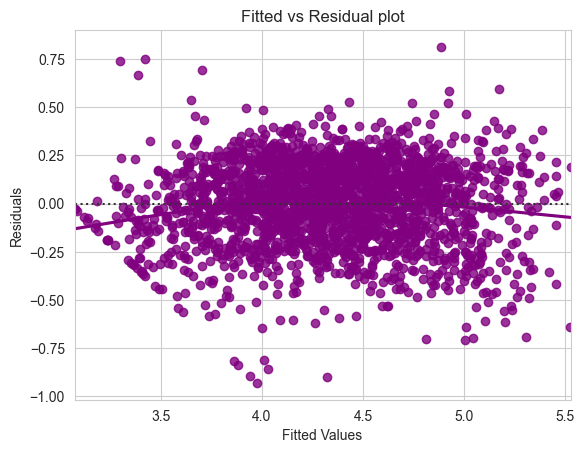

In [127]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=check3_df, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**NOTES:**
- The plot shows the distribution of residuals (errors) vs fitted values (predicted values).
- If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.
- We see no pattern in the plot above. Hence, **the assumptions of linearity and independence are satisfied.**

#### Test for Normality

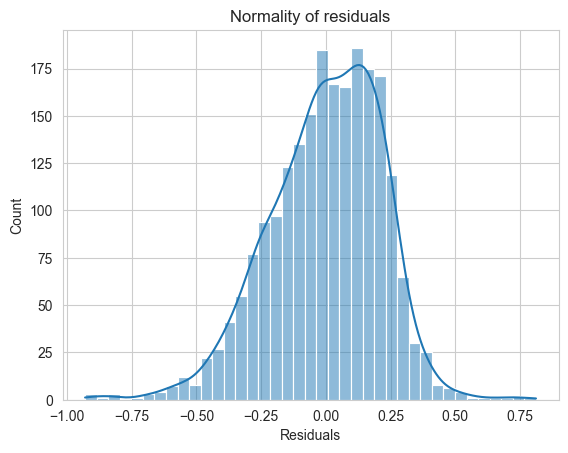

In [128]:
#Plot the distribution of residuals
sns.histplot(check3_df["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

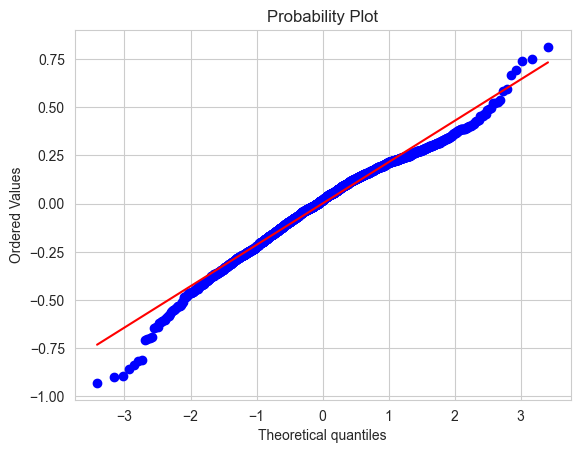

In [129]:
# QQplot
stats.probplot(check3_df["Residuals"], dist="norm", plot=pylab)
plt.show()

In [130]:
stats.shapiro(check3_df["Residuals"])

ShapiroResult(statistic=0.9832592606544495, pvalue=2.598801055470469e-15)

**NOTES:**
- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- So, **the assumption of normality is satisfied.**

#### Test for Homoscedasticity

In [131]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(check3_df["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0289166941528927), ('p-value', 0.3199777521407358)]

**NOTES:**
- Test for homoscedasticity by using the goldfeldquandt test
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
- As per the goldfeldquandt test results, we can conclude **the assumption of Heteroscedasticity is satisfied.**


#### Consolidated Notes from Linear Regression assumptions

**Multicollinearity**
- The variable "years_old" have VIF value 5.31, indicating presence of strong multicollinearity
- This is the only variable to be elimitaned as we will ignore the VIF values for dummy variables and the constant (intercept)
- After droping the variable "years_old" we have all VIF values under the threshold of 5, then is verified No Multicollinearity in the model "olsmodel1"
- Now that we do not have multicollinearity in our data, the p-values of the coefficients have become reliable and we can remove the non-significant predictor variables.
- In olsmodel2, two variables 'brand_name_BlackBerry' and 'brand_name_XOLO' had an increase on p-value. A second iteration required.
- Now no feature has p-value greater than 0.05, so we'll consider the features in x_train3 as the final set of predictor variables and **olsmodel3** as the final model to move forward with.
- Now adjusted R-squared is 0.8186, i.e., our model is able to explain ~82% of the variance
- The adjusted R-squared in olsmod1 (where we considered the variables without multicollinearity) was 0.8214
- This shows that dropping the variables had a minor impact the model
- RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting


**Linearity of variables and Independence of error terms**
- The plot shows the distribution of residuals (errors) vs fitted values (predicted values).
- If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.
- We see no pattern in the plot above. Hence, **the assumptions of linearity and independence are satisfied.**


**Normality of error terms**
- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- So, **the assumption of normality is satisfied.**


**Heteroscedasticity**
- Test for homoscedasticity by using the goldfeldquandt test
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
- As per the goldfeldquandt test results, we can conclude **the assumption of Heteroscedasticity is satisfied.**


## Final Model

In [132]:
print(olsmodel3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.819
Model:                               OLS   Adj. R-squared:                  0.818
Method:                    Least Squares   F-statistic:                     977.4
Date:                   Sat, 08 Jun 2024   Prob (F-statistic):               0.00
Time:                           04:51:58   Log-Likelihood:                 249.11
No. Observations:                   2177   AIC:                            -476.2
Df Residuals:                       2166   BIC:                            -413.7
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [133]:
compare_df

Model  RMSE_Train  MAE_Train  R2_Train  Adj_R2_Train  MAPE_Train  \
0   olsmodel      0.2141     0.1704    0.8214        0.8172      4.0070   
1  olsmodel1      0.2142     0.1704    0.8214        0.8172      4.0071   
2  olsmodel2      0.2155     0.1715    0.8191        0.8148      4.0363   
3  olsmodel3      0.2158     0.1718    0.8186        0.8143      4.0424   

   RMSE_Test  MAE_Test  R2_Test  Adj_R2_Test  MAPE_Test  
0     0.2140    0.1695   0.8061       0.7951     4.0127  
1     0.2139    0.1694   0.8062       0.7952     4.0094  
2     0.2127    0.1684   0.8084       0.7976     3.9857  
3     0.2122    0.1681   0.8092       0.7984     3.9762

In [134]:
# Extracting the relevant statistics
variable_names = x_train3.columns
coefficients = olsmodel3.params
p_values = olsmodel3.pvalues
standard_errors = olsmodel3.bse
t_values = olsmodel3.tvalues

# Creating a dictionary with the statistics
results_dict = {
    'Variable': variable_names,
    'Coefficient': coefficients,
    'Standard Error': standard_errors,
    'T-value': t_values,
    'P-value': p_values
}

# Creating a DataFrame from the dictionary
results3_df = pd.DataFrame(results_dict)

# Print the resulting DataFrame
results3_df.sort_values('Coefficient', ascending=False)['Coefficient'].head(4)

ram                    0.3465
normalized_new_price   0.3369
const                  0.0866
tech_4G                0.0540
Name: Coefficient, dtype: float64

## Actionable Insights and Recommendations

**Insights**
- The model is able to explain ~82% of the variation in the data and within 4% of the used device price.
- This indicates that the model is good for prediction as well as inference purposes
- If the Amount of RAM in GB of the device increases by one unit, then the Normalized price of the used/refurbished device in euros increases by 0.3465 units, all other variables held constant
- If the Normalized price of a new device of the same model in euros of the device increases by one unit, then the Normalized price of the used/refurbished device in euros increases by 0.3369 units, all other variables held constant
- If 4G is available on the device, then the Normalized price of the used/refurbished device in euros increases by 0.054 units, all other variables held constant

**Recommendations**
- ReCell might focus on 4G devices.
    - focus on 5G devices should be delayed, as this variable as minimal impact on price as per data.
    - Considering 5G being the latest technology, most of units available are new and used market is still low.
    - 2G, 3G devices should be avoided. Today's utilization of the devices requires at least 4G technology for  satisfactory user experience.
- ReCell might focus on high value devices, as this units have better resell value
- ReCell should focus on RAM memory as device characteristics. 
    - As each brand might add a number of particular features and functionalities to their products
    - ReCell can use RAM Memory as a common (all unites have it) and relatable metric for evaluation by ReCell users.

In [136]:
#create html version
!jupyter nbconvert --to html SLF_Project_LearnerNotebook_FullCode.ipynb


[NbConvertApp] Converting notebook SLF_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 16 image(s).
[NbConvertApp] Writing 4466116 bytes to SLF_Project_LearnerNotebook_FullCode.html
